In [1]:
import pandas as pd 


In [2]:
data = pd.read_excel(r"E:\Unofficial Thesis\Crime spot\Spatio_temporal\Crime.xlsx")
data.drop(columns=['Total_Recovery_Cases'], inplace=True)
data


Year    Month   Names_of_Unit  Dacoity  Robbery  Murder  Speedy_Trial  \
0     2019  January             DMP        1       10      19            10   
1     2019  January             CMP        0        3       9             5   
2     2019  January             KMP        1        0       4             1   
3     2019  January             RMP        0        4       1             1   
4     2019  January             BMP        0        0       0             0   
...    ...      ...             ...      ...      ...     ...           ...   
1345  2025    March  Barishal Range        5        1      14            12   
1346  2025    March  Rajshahi Range        7       10      21             4   
1347  2025    March   Rangpur Range        2       10      26             0   
1348  2025    March   Railway Range        0        3       0             1   
1349  2025    March           Total       60      171     316            90   

      Riot  Woman&Child Repression  Kidnapping  Police_Assault  Burglary  \
0        0                     118           9               6        49   
1        0                      22           0               5         6   
2        0                       8           0               0         6   
3        1                      11           0               0         4   
4        0                      14           1               0         4   
...    ...                     ...         ...             ...       ...   
1345     0                     164           2               2        13   
1346     0                     271           5               4         8   
1347     0                     218           7               1         6   
1348     0                       0           1               0         0   
1349    16                    2054          83              96       206   

      Theft  Other_Cases  Arms_Act  Explosives_Act  Narcotics  Smuggling  \
0       127          411         6               3       1370         14   
1        15          125        38               0        449          1   
2         4           16         2               0        272          3   
3         6           52         3               0        283         35   
4         6           49         1               0         91          0   
...     ...          ...       ...             ...        ...        ...   
1345     44          564         3               0        150          0   
1346     79          930         6              11        485         12   
1347     80          795         1               1        395          4   
1348     15           20         0               0         31          4   
1349    866         7849       131              29       4075        198   

      Total_Cases Total_Population  
0            2153         15210851  
1             678          9439076  
2             317          2673002  
3             401          2978156  
4             166          2634203  
...           ...              ...  
1345          974          6691618  
1346         1853        17815863‬  
1347         1546         14776825  
1348           75         18000000  
1349        16240        109810054  

[1350 rows x 20 columns]

In [3]:
# Remove hidden Unicode, commas
data["Total_Population"] = data["Total_Population"].astype(str).str.replace(r"[^\d.]", "", regex=True)
data["Total_Population"] = pd.to_numeric(data["Total_Population"], errors="coerce")

data["Total_Cases"] = pd.to_numeric(data["Total_Cases"], errors="coerce")

data["Crime_Rate_per_100k"] = (data["Total_Cases"] / data["Total_Population"]) * 100000

data


Year    Month   Names_of_Unit  Dacoity  Robbery  Murder  Speedy_Trial  \
0     2019  January             DMP        1       10      19            10   
1     2019  January             CMP        0        3       9             5   
2     2019  January             KMP        1        0       4             1   
3     2019  January             RMP        0        4       1             1   
4     2019  January             BMP        0        0       0             0   
...    ...      ...             ...      ...      ...     ...           ...   
1345  2025    March  Barishal Range        5        1      14            12   
1346  2025    March  Rajshahi Range        7       10      21             4   
1347  2025    March   Rangpur Range        2       10      26             0   
1348  2025    March   Railway Range        0        3       0             1   
1349  2025    March           Total       60      171     316            90   

      Riot  Woman&Child Repression  Kidnapping  ...  Burglary  Theft  \
0        0                     118           9  ...        49    127   
1        0                      22           0  ...         6     15   
2        0                       8           0  ...         6      4   
3        1                      11           0  ...         4      6   
4        0                      14           1  ...         4      6   
...    ...                     ...         ...  ...       ...    ...   
1345     0                     164           2  ...        13     44   
1346     0                     271           5  ...         8     79   
1347     0                     218           7  ...         6     80   
1348     0                       0           1  ...         0     15   
1349    16                    2054          83  ...       206    866   

      Other_Cases  Arms_Act  Explosives_Act  Narcotics  Smuggling  \
0             411         6               3       1370         14   
1             125        38               0        449          1   
2              16         2               0        272          3   
3              52         3               0        283         35   
4              49         1               0         91          0   
...           ...       ...             ...        ...        ...   
1345          564         3               0        150          0   
1346          930         6              11        485         12   
1347          795         1               1        395          4   
1348           20         0               0         31          4   
1349         7849       131              29       4075        198   

      Total_Cases  Total_Population  Crime_Rate_per_100k  
0            2153          15210851            14.154369  
1             678           9439076             7.182906  
2             317           2673002            11.859325  
3             401           2978156            13.464708  
4             166           2634203             6.301716  
...           ...               ...                  ...  
1345          974           6691618            14.555523  
1346         1853          17815863            10.400843  
1347         1546          14776825            10.462329  
1348           75          18000000             0.416667  
1349        16240         109810054            14.789174  

[1350 rows x 21 columns]

In [4]:
data[data.isnull().any(axis=1)]


Empty DataFrame
Columns: [Year, Month, Names_of_Unit, Dacoity, Robbery, Murder, Speedy_Trial, Riot, Woman&Child Repression, Kidnapping, Police_Assault, Burglary, Theft, Other_Cases, Arms_Act, Explosives_Act, Narcotics, Smuggling, Total_Cases, Total_Population, Crime_Rate_per_100k]
Index: []

[0 rows x 21 columns]

In [5]:
import geopandas as gpd


In [6]:
gdf = gpd.read_file(r"E:\Unofficial Thesis\Crime spot\geo 1\bgd_admbnda_adm1_bbs_20201113.shp")
gdf


Shape_Leng  Shape_Area     ADM1_EN ADM1_PCODE ADM1_REF ADM1ALT1EN  \
0   25.424604    0.889395     Barisal       BD10     None       None   
1   30.287321    2.737796  Chittagong       BD20     None       None   
2   12.197758    1.806506       Dhaka       BD30     None       None   
3   38.409385    1.826575      Khulna       BD40     None       None   
4    8.166577    0.941812  Mymensingh       BD45     None       None   
5    8.410221    1.624856    Rajshahi       BD50     None       None   
6   15.369683    1.465681     Rangpur       BD55     None       None   
7    9.800293    1.103963      Sylhet       BD60     None       None   

  ADM1ALT2EN     ADM0_EN ADM0_PCODE       date    validOn     validTo  \
0       None  Bangladesh         BD 2015-01-01 2020-11-13  0000/00/00   
1       None  Bangladesh         BD 2015-01-01 2020-11-13  0000/00/00   
2       None  Bangladesh         BD 2015-01-01 2020-11-13  0000/00/00   
3       None  Bangladesh         BD 2015-01-01 2020-11-13  0000/00/00   
4       None  Bangladesh         BD 2015-01-01 2020-11-13  0000/00/00   
5       None  Bangladesh         BD 2015-01-01 2020-11-13  0000/00/00   
6       None  Bangladesh         BD 2015-01-01 2020-11-13  0000/00/00   
7       None  Bangladesh         BD 2015-01-01 2020-11-13  0000/00/00   

                                            geometry  
0  MULTIPOLYGON (((90.47753 21.76919, 90.4764 21....  
1  MULTIPOLYGON (((92.32719 20.63543, 92.32749 20...  
2  MULTIPOLYGON (((90.45673 23.00396, 90.45631 23...  
3  MULTIPOLYGON (((89.24623 21.68914, 89.2484 21....  
4  POLYGON ((89.76844 25.43233, 89.76857 25.43221...  
5  POLYGON ((89.02818 25.27743, 89.02833 25.27742...  
6  MULTIPOLYGON (((89.51742 26.0265, 89.51753 26....  
7  MULTIPOLYGON (((91.30353 23.99673, 91.30344 23...

<Axes: >

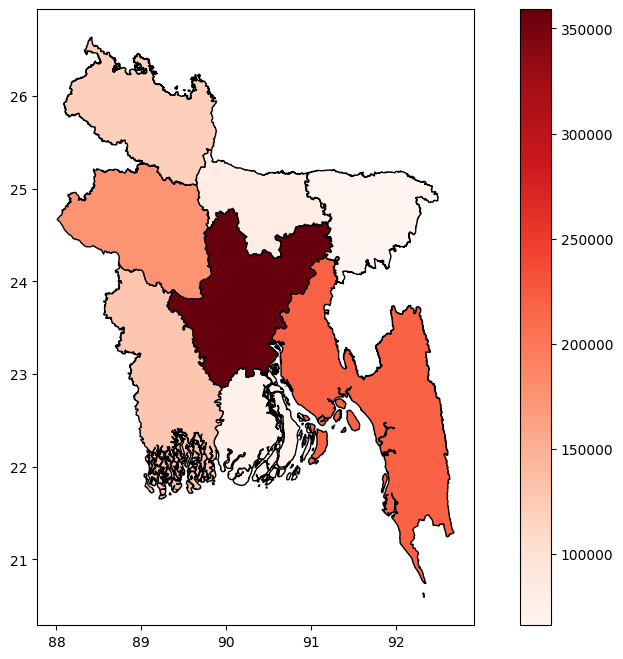

In [7]:
gdf['ADM1_EN'] = gdf['ADM1_EN'].str.strip().str.title()
unit_to_division = {
    "DMP": "Dhaka", "GMP": "Dhaka", "Dhaka Range": "Dhaka",
    "CMP": "Chittagong", "Chittagong Range": "Chittagong",
    "KMP": "Khulna", "Khulna Range": "Khulna",
    "RMP": "Rajshahi", "Rajshahi Range": "Rajshahi",
    "SMP": "Sylhet", "Sylhet Range": "Sylhet",
    "RPMP": "Rangpur", "Rangpur Range": "Rangpur",
    "BMP": "Barisal", "Barishal Range": "Barisal",
    "Mymensingh Range": "Mymensingh"
}

data['Mapped_Division'] = data['Names_of_Unit'].map(unit_to_division)

crime_by_div = data.groupby('Mapped_Division').sum(numeric_only=True).reset_index()

merged_gdf = gdf.merge(crime_by_div, left_on='ADM1_EN', right_on='Mapped_Division', how='left')
merged_gdf.plot(column='Total_Cases', cmap='Reds', legend=True, edgecolor='black', figsize=(12, 8))


In [8]:
data = data[~data["Names_of_Unit"].isin(["Total", "Railway Range","Ralway Range","RTMP"])].reset_index(drop=True)
data


Year    Month   Names_of_Unit  Dacoity  Robbery  Murder  Speedy_Trial  \
0     2019  January             DMP        1       10      19            10   
1     2019  January             CMP        0        3       9             5   
2     2019  January             KMP        1        0       4             1   
3     2019  January             RMP        0        4       1             1   
4     2019  January             BMP        0        0       0             0   
...    ...      ...             ...      ...      ...     ...           ...   
1194  2025    March    Sylhet Range        3        5      13             1   
1195  2025    March    Khulna Range        2       11      36            12   
1196  2025    March  Barishal Range        5        1      14            12   
1197  2025    March  Rajshahi Range        7       10      21             4   
1198  2025    March   Rangpur Range        2       10      26             0   

      Riot  Woman&Child Repression  Kidnapping  ...  Theft  Other_Cases  \
0        0                     118           9  ...    127          411   
1        0                      22           0  ...     15          125   
2        0                       8           0  ...      4           16   
3        1                      11           0  ...      6           52   
4        0                      14           1  ...      6           49   
...    ...                     ...         ...  ...    ...          ...   
1194     0                      97           0  ...     50          541   
1195     0                     218           2  ...     81          772   
1196     0                     164           2  ...     44          564   
1197     0                     271           5  ...     79          930   
1198     0                     218           7  ...     80          795   

      Arms_Act  Explosives_Act  Narcotics  Smuggling  Total_Cases  \
0            6               3       1370         14         2153   
1           38               0        449          1          678   
2            2               0        272          3          317   
3            3               0        283         35          401   
4            1               0         91          0          166   
...        ...             ...        ...        ...          ...   
1194         3               0        142         28          901   
1195        15               2        366         16         1551   
1196         3               0        150          0          974   
1197         6              11        485         12         1853   
1198         1               1        395          4         1546   

      Total_Population  Crime_Rate_per_100k  Mapped_Division  
0             15210851            14.154369            Dhaka  
1              9439076             7.182906       Chittagong  
2              2673002            11.859325           Khulna  
3              2978156            13.464708         Rajshahi  
4              2634203             6.301716          Barisal  
...                ...                  ...              ...  
1194           7425110            12.134500           Sylhet  
1195          15140217            10.244239           Khulna  
1196           6691618            14.555523          Barisal  
1197          17815863            10.400843         Rajshahi  
1198          14776825            10.462329          Rangpur  

[1199 rows x 22 columns]

**Temporal Analysis**

In [9]:
data["Month"] = data["Month"].str.strip().str.title()

month_map = {
    "January": 1, "February": 2, "March": 3, "April": 4,
    "May": 5, "June": 6, "July": 7, "August": 8,
    "September": 9, "October": 10, "November": 11, "December": 12
}
data["Month_Num"] = data["Month"].map(month_map)
data["Year"] = data["Year"].astype(int)

data["Date"] = pd.to_datetime(dict(year=data["Year"], month=data["Month_Num"], day=1))
data = data.sort_values("Date").reset_index(drop=True)

data


Year    Month   Names_of_Unit  Dacoity  Robbery  Murder  Speedy_Trial  \
0     2019  January             DMP        1       10      19            10   
1     2019  January   Rangpur Range        1        2      33             0   
2     2019  January  Rajshahi Range        5        8      29             6   
3     2019  January  Barishal Range        2        3      16             2   
4     2019  January    Khulna Range        4        4      37             0   
...    ...      ...             ...      ...      ...     ...           ...   
1194  2025    March             KMP        0        5       1             3   
1195  2025    March             CMP        1        4       7             8   
1196  2025    March             DMP        3       38      33            12   
1197  2025    March            RPMP        0        1       0             1   
1198  2025    March   Rangpur Range        2       10      26             0   

      Riot  Woman&Child Repression  Kidnapping  ...  Arms_Act  Explosives_Act  \
0        0                     118           9  ...         6               3   
1        0                     116           0  ...         4               0   
2        0                      99           8  ...        25              15   
3        0                      86           3  ...         1               0   
4        0                      99           2  ...        13               3   
...    ...                     ...         ...  ...       ...             ...   
1194     0                      14           1  ...         4               0   
1195     0                      46           8  ...         6               1   
1196    15                     162          19  ...        20               2   
1197     0                      10           1  ...         2               0   
1198     0                     218           7  ...         1               1   

      Narcotics  Smuggling  Total_Cases  Total_Population  \
0          1370         14         2153          15210851   
1           551         94         1422          14776825   
2          1166        134         2011          17815863   
3           363          0          895           6691618   
4           814         20         1585          15140217   
...         ...        ...          ...               ...   
1194         61          0          170           2673002   
1195        140          2          437           9439076   
1196        538         10         1754          15210851   
1197         21          0           69           3243247   
1198        395          4         1546          14776825   

      Crime_Rate_per_100k  Mapped_Division  Month_Num       Date  
0               14.154369            Dhaka          1 2019-01-01  
1                9.623177          Rangpur          1 2019-01-01  
2               11.287693         Rajshahi          1 2019-01-01  
3               13.374942          Barisal          1 2019-01-01  
4               10.468806           Khulna          1 2019-01-01  
...                   ...              ...        ...        ...  
1194             6.359890           Khulna          3 2025-03-01  
1195             4.629690       Chittagong          3 2025-03-01  
1196            11.531242            Dhaka          3 2025-03-01  
1197             2.127498          Rangpur          3 2025-03-01  
1198            10.462329          Rangpur          3 2025-03-01  

[1199 rows x 24 columns]

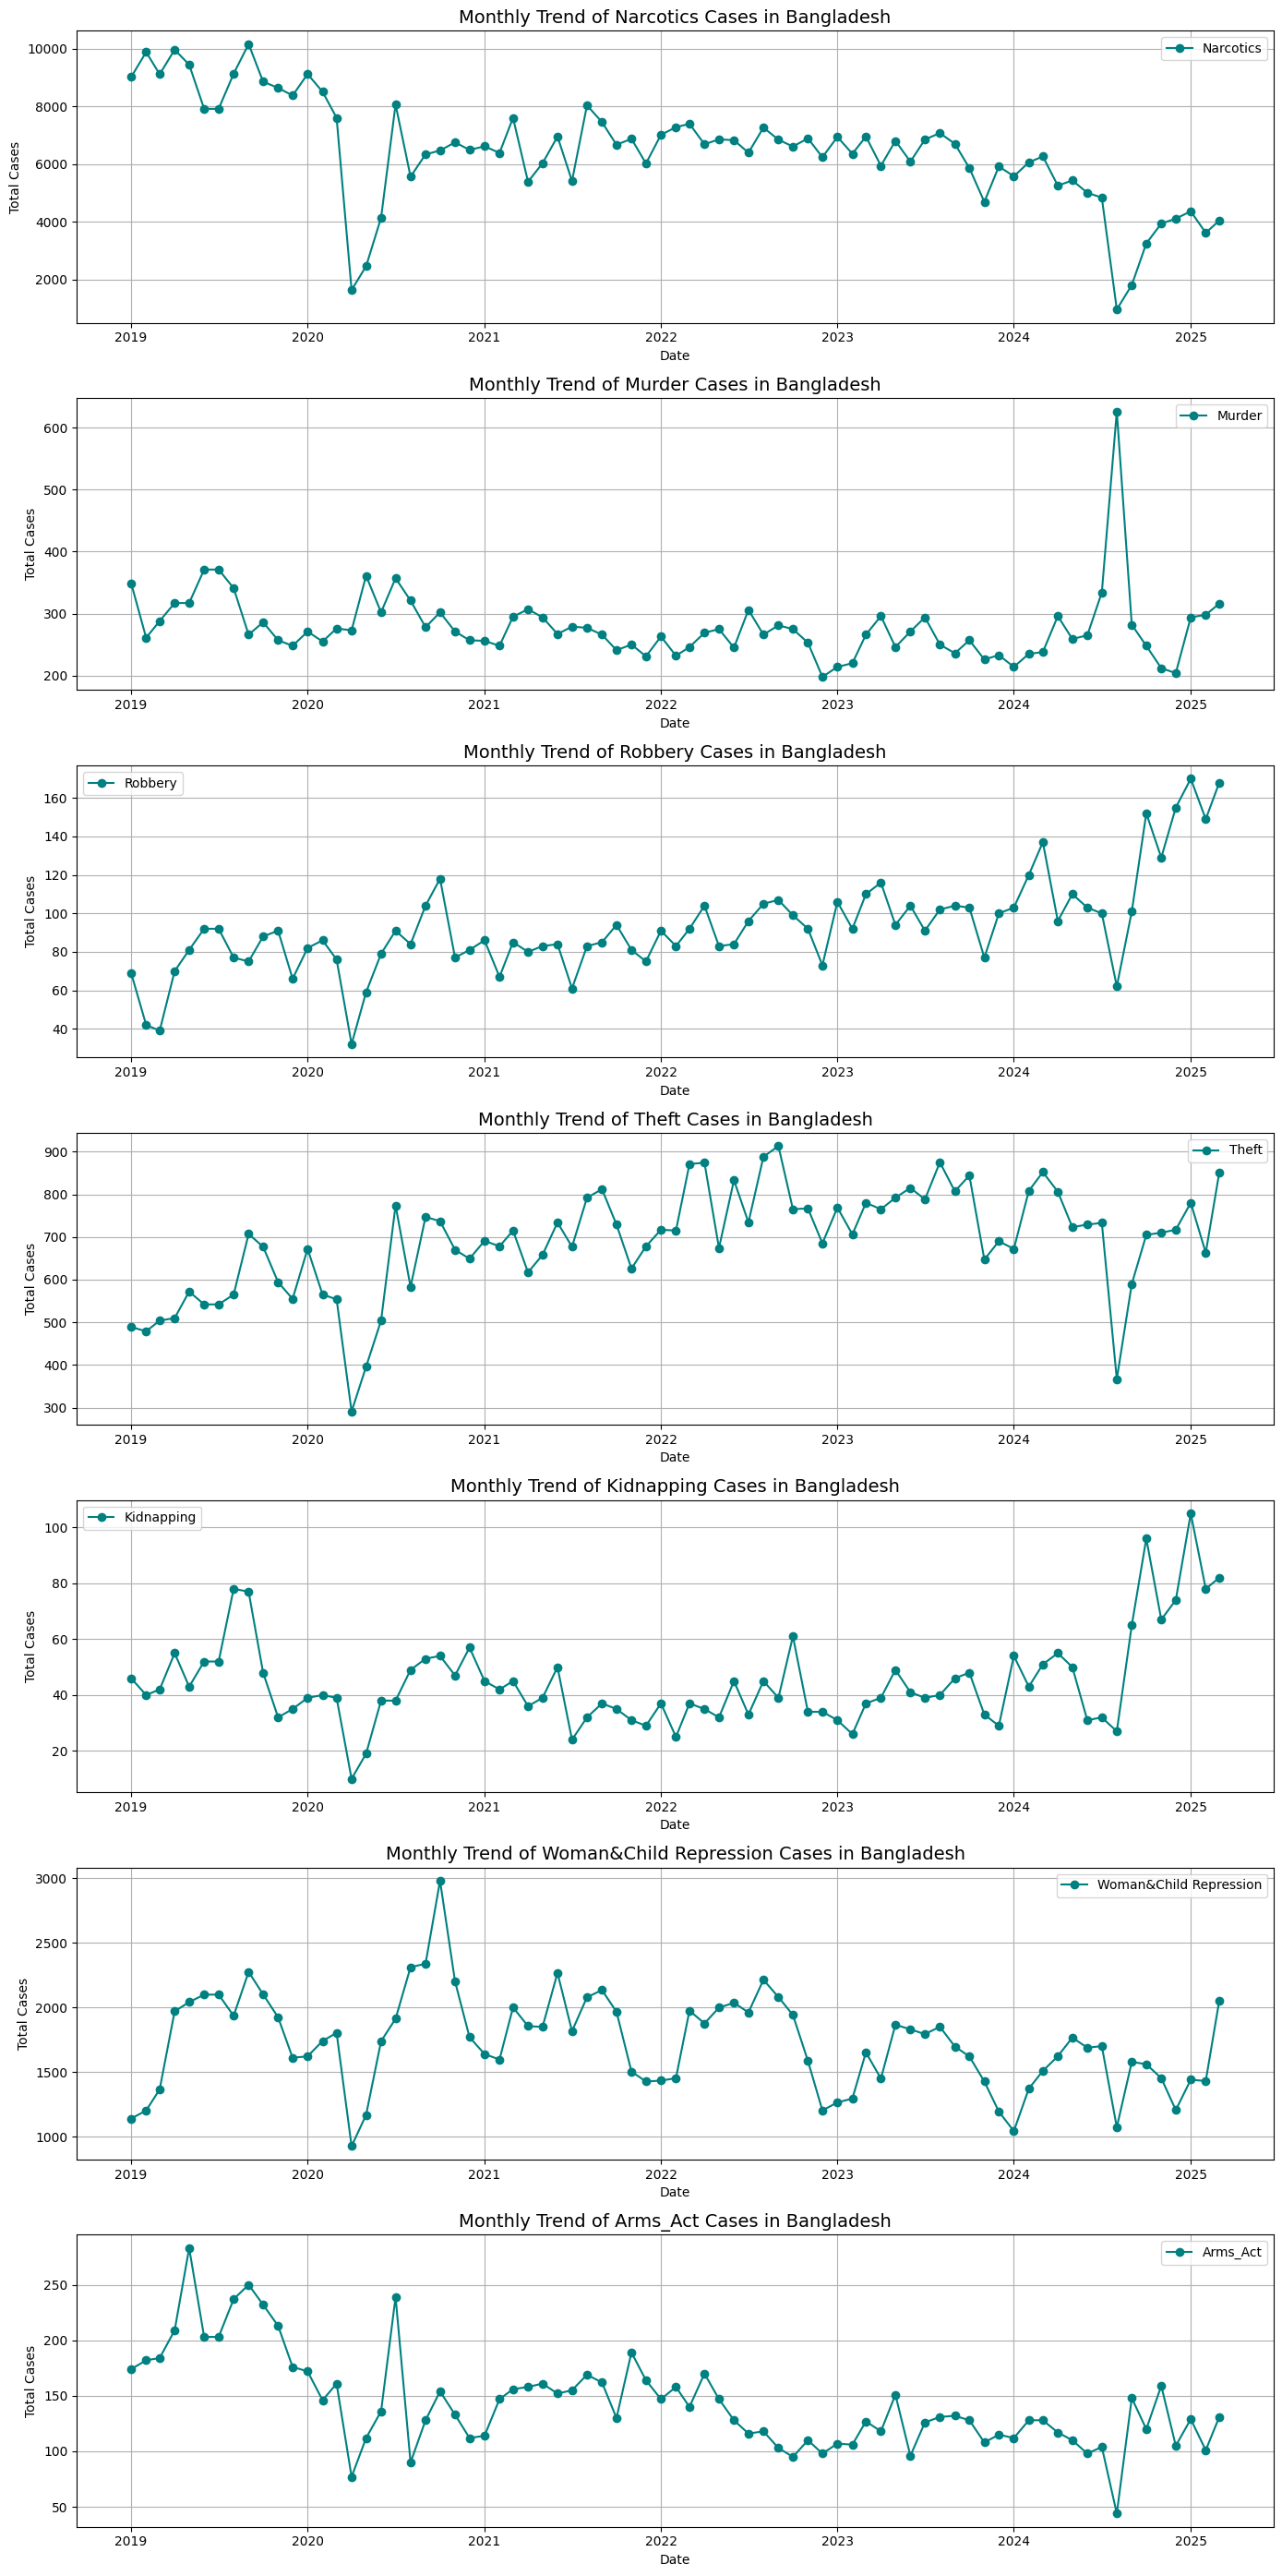

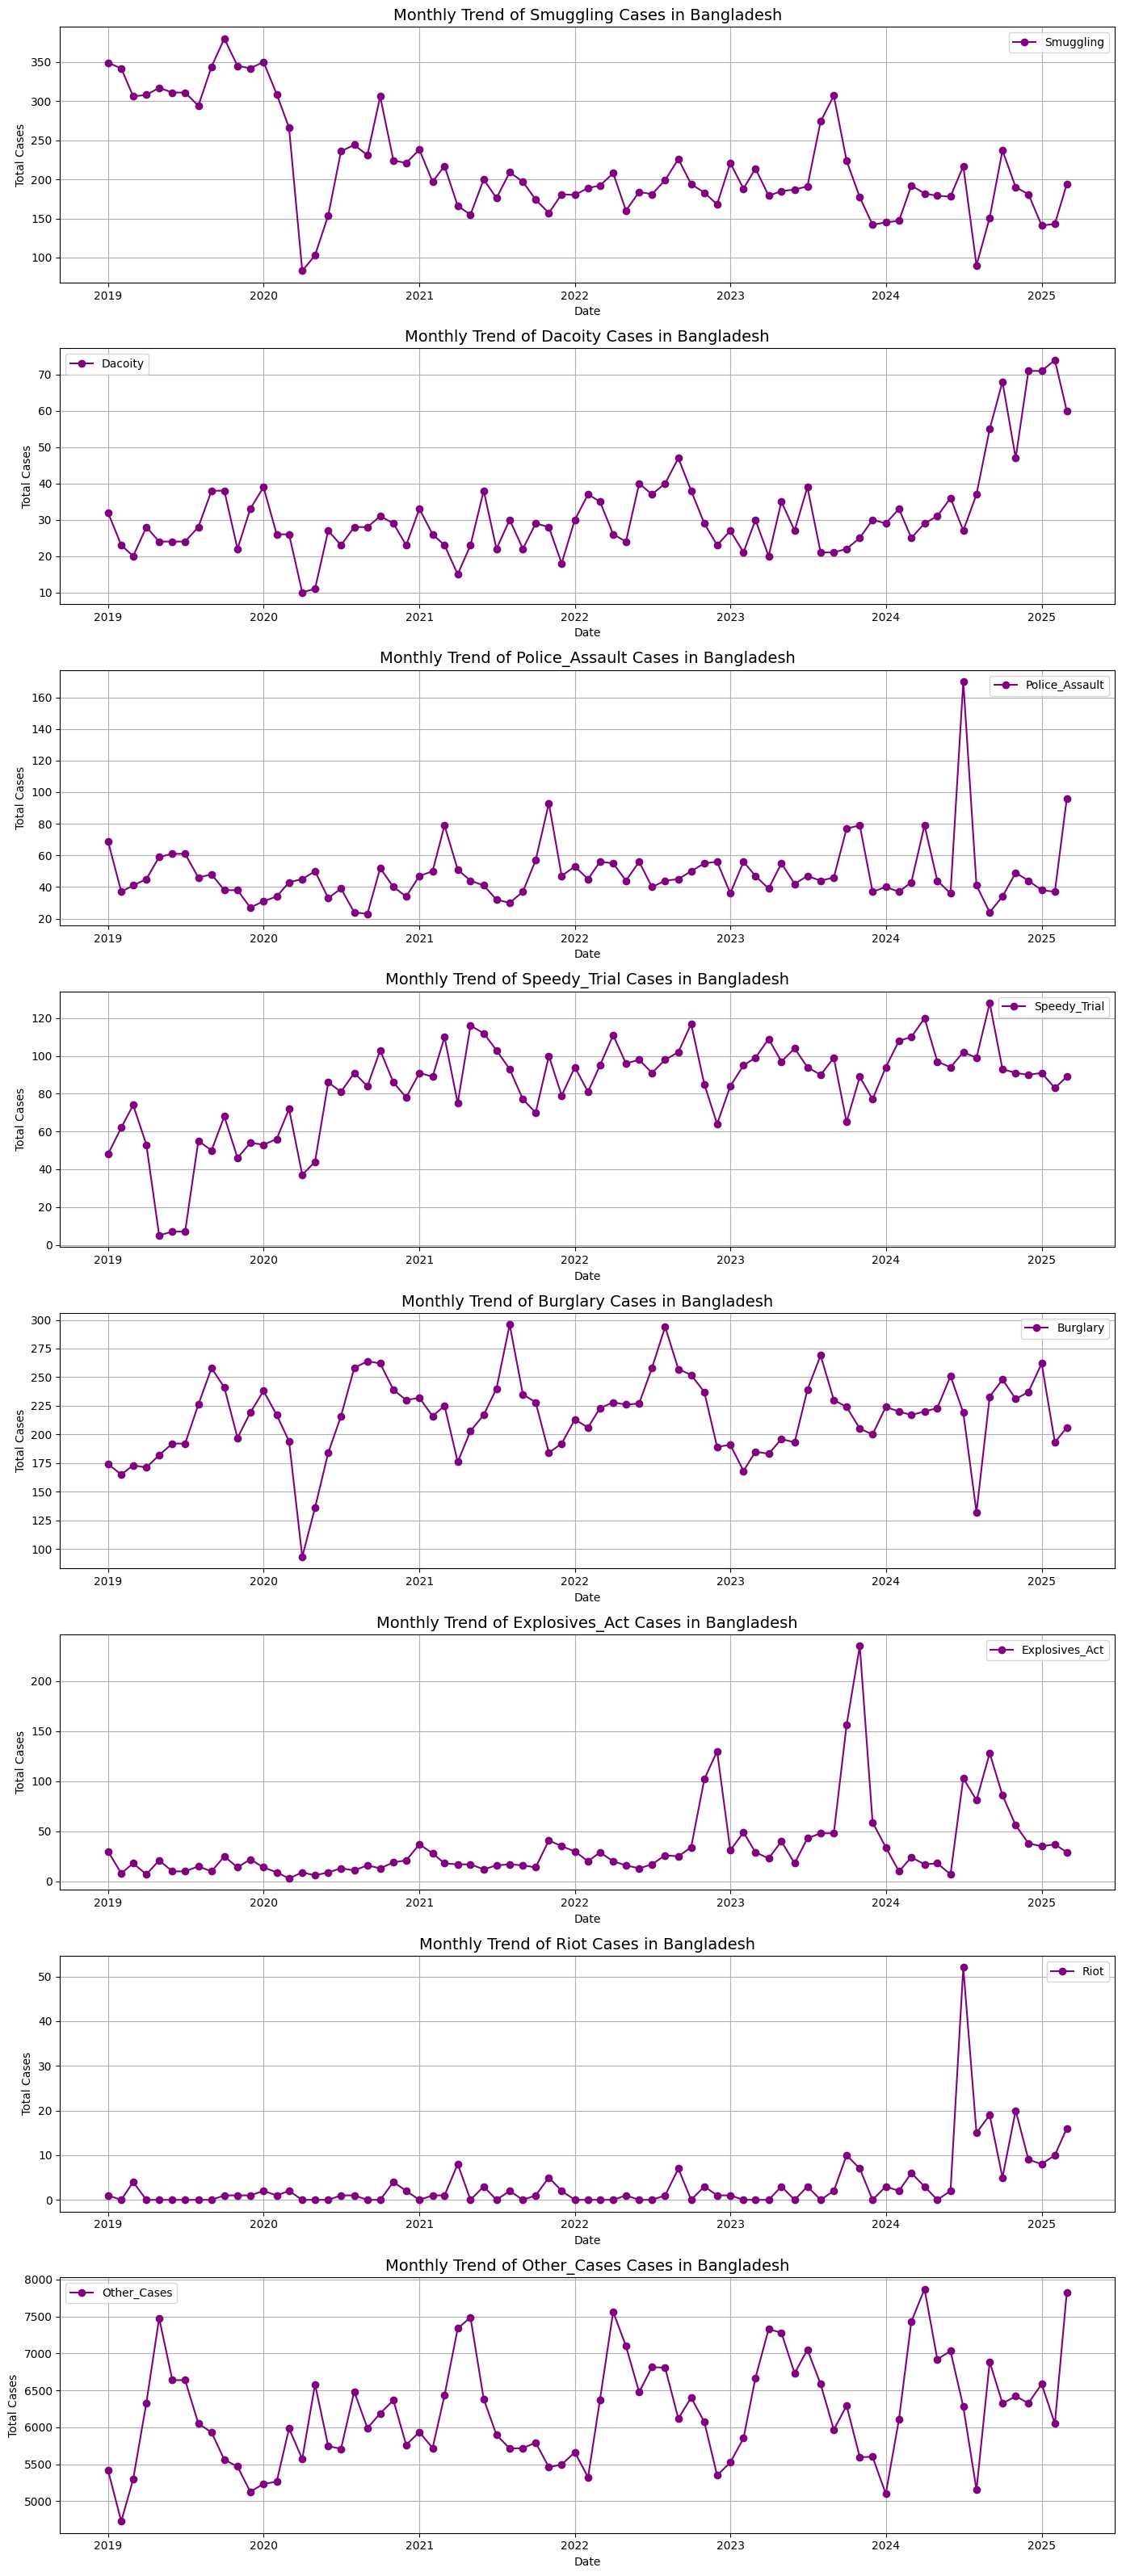

In [16]:
import matplotlib.pyplot as plt

major_crimes = [
    'Narcotics', 'Murder', 'Robbery', 'Theft',
    'Kidnapping', 'Woman&Child Repression', 'Arms_Act', 'Smuggling',
    'Dacoity', 'Police_Assault', 'Speedy_Trial', 'Burglary',
    'Explosives_Act', 'Riot', 'Other_Cases'
]

# Split into two sections
first_section = major_crimes[:7]   # First 7 crimes
second_section = major_crimes[7:]  # Remaining 8 crimes

# Plot first section
fig1, axes1 = plt.subplots(nrows=len(first_section), ncols=1, figsize=(14, 4 * len(first_section)))

for ax, crime in zip(axes1, first_section):
    trend = data.groupby("Date")[crime].sum()
    ax.plot(trend.index, trend.values, marker='o', linestyle='-', label=crime, color='teal')
    ax.set_title(f"Monthly Trend of {crime} Cases in Bangladesh", fontsize=14)
    ax.set_xlabel("Date")
    ax.set_ylabel("Total Cases")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

# Plot second section
fig2, axes2 = plt.subplots(nrows=len(second_section), ncols=1, figsize=(14, 4 * len(second_section)))

for ax, crime in zip(axes2, second_section):
    trend = data.groupby("Date")[crime].sum()
    ax.plot(trend.index, trend.values, marker='o', linestyle='-', label=crime, color='purple')
    ax.set_title(f"Monthly Trend of {crime} Cases in Bangladesh", fontsize=14)
    ax.set_xlabel("Date")
    ax.set_ylabel("Total Cases")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


In [11]:
import plotly.express as px
heatmap_df = data.groupby(['Date', 'Names_of_Unit'])['Total_Cases'].sum().reset_index()

fig = px.density_heatmap(
    heatmap_df,
    x='Date',
    y='Names_of_Unit',
    z='Total_Cases',
    color_continuous_scale='Reds',
    title='Temporal Heatmap of Total Cases per Police Unit',
    height=700
)
fig.show()


Animated Map for Kepler.gl

In [12]:
kepler_ready = data[['Date', 'Names_of_Unit', 'Mapped_Division', 'Total_Cases', 'Crime_Rate_per_100k']]
kepler_ready.to_csv("kepler_ready.csv", index=False)



Cluster Units by Total_Cases Over Time

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



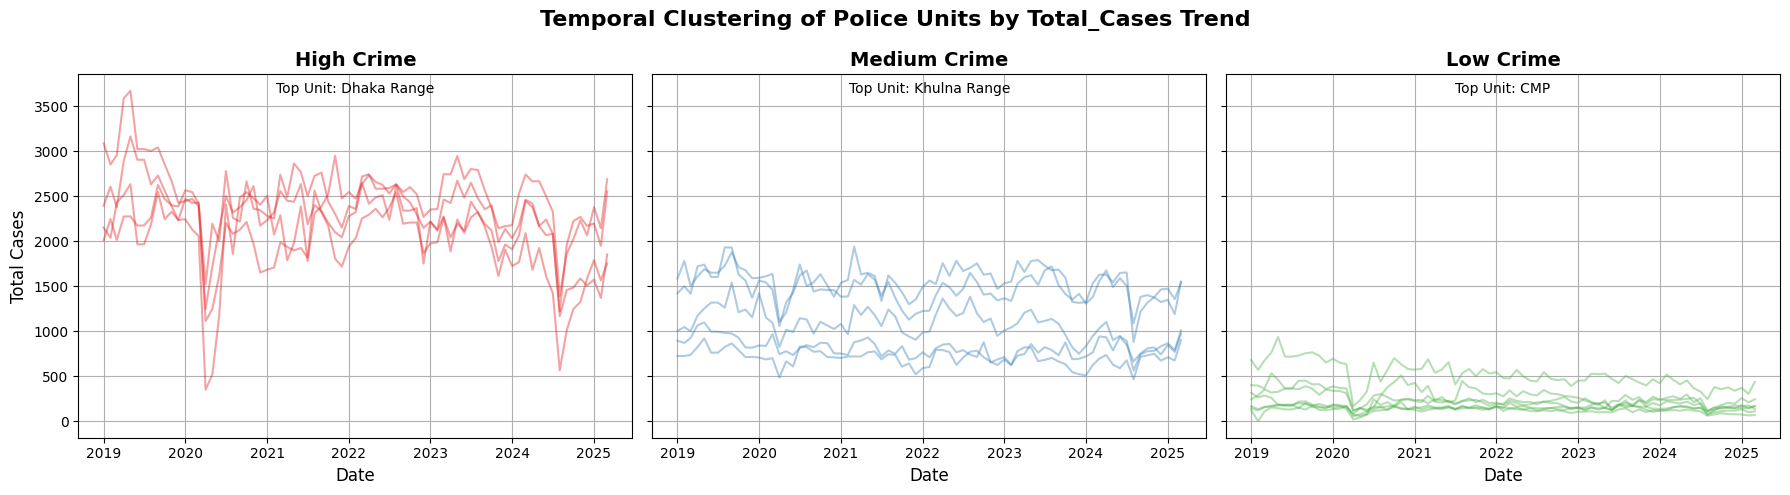

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Create pivot table
pivot_df = data.pivot_table(index="Names_of_Unit", columns="Date", values="Total_Cases", aggfunc="sum").fillna(0)

# Step 2: Scale data
scaler = StandardScaler()
pivot_scaled = scaler.fit_transform(pivot_df)

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(pivot_scaled)
pivot_df['Cluster'] = cluster_labels

# Step 4: Dynamically assign labels based on average crime
cluster_means = pivot_df.groupby('Cluster').mean().mean(axis=1)
sorted_clusters = cluster_means.sort_values(ascending=False).index.tolist()  # High to Low

cluster_mapping = {}
if len(sorted_clusters) == 3:
    cluster_mapping[sorted_clusters[0]] = 'High Crime'
    cluster_mapping[sorted_clusters[1]] = 'Medium Crime'
    cluster_mapping[sorted_clusters[2]] = 'Low Crime'

pivot_df['Cluster_Label'] = pivot_df['Cluster'].map(cluster_mapping)

# Step 5: Prepare for plotting
pivot_df_no_cluster = pivot_df.drop(columns=['Cluster'])

unique_clusters = sorted(pivot_df_no_cluster['Cluster_Label'].unique(), 
                         key=lambda x: ['High Crime', 'Medium Crime', 'Low Crime'].index(x))
n_clusters = len(unique_clusters)

fig, axes = plt.subplots(1, n_clusters, figsize=(6 * n_clusters, 5), sharey=True)
colors = sns.color_palette('Set1', n_colors=n_clusters)

# Step 6: Plot each cluster
for label, ax, color in zip(unique_clusters, axes, colors):
    subset = pivot_df_no_cluster[pivot_df_no_cluster['Cluster_Label'] == label].drop(columns=['Cluster_Label'])
    for row in subset.values:
        ax.plot(subset.columns, row, alpha=0.4, color=color)
    ax.set_title(f"{label}", fontsize=14, weight='bold')
    ax.set_xlabel("Date", fontsize=12)
    ax.grid(True)
    top_unit_name = subset.mean(axis=1).idxmax()
    ax.text(0.5, 0.95, f"Top Unit: {top_unit_name}", transform=ax.transAxes, ha='center', fontsize=10, color='black')

axes[0].set_ylabel("Total Cases", fontsize=12)
plt.suptitle("Temporal Clustering of Police Units by Total_Cases Trend", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


**Correlation Between those Crimes**


 Processing Correlations for Division: Barisal


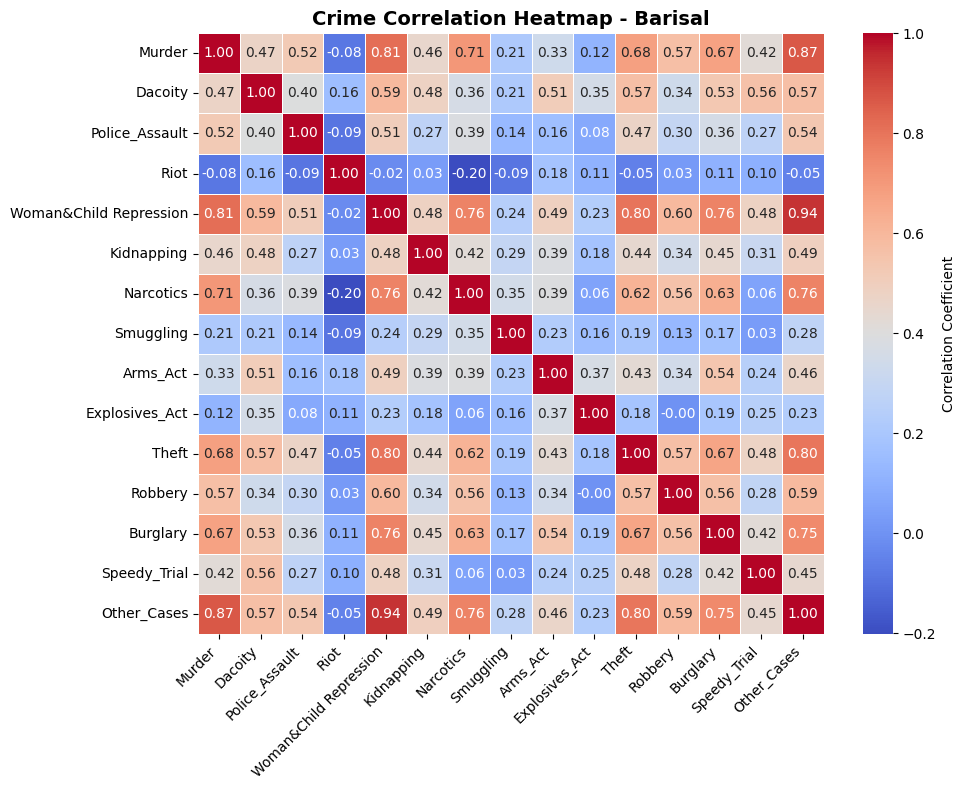


 Processing Correlations for Division: Chittagong


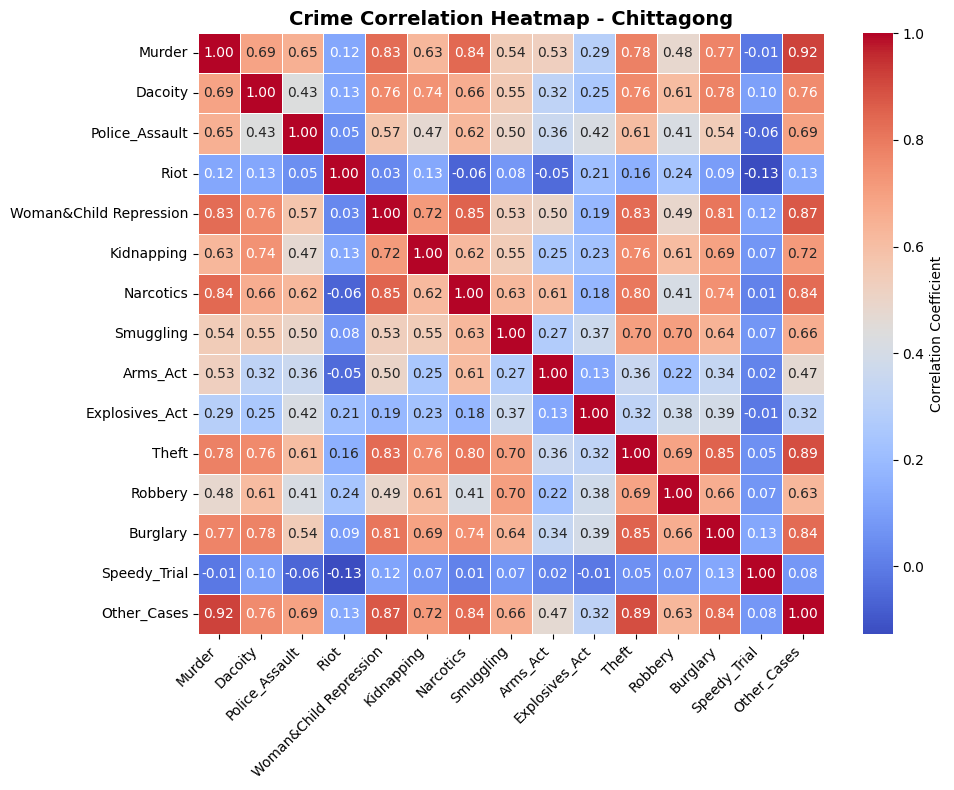


 Processing Correlations for Division: Dhaka


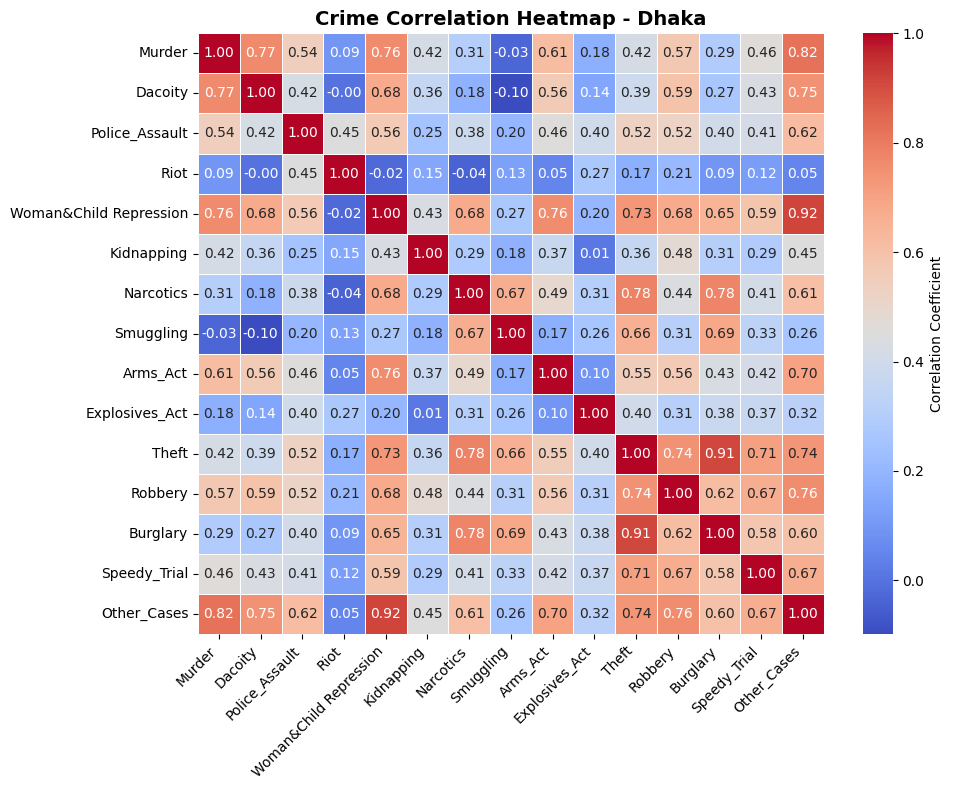


 Processing Correlations for Division: Khulna


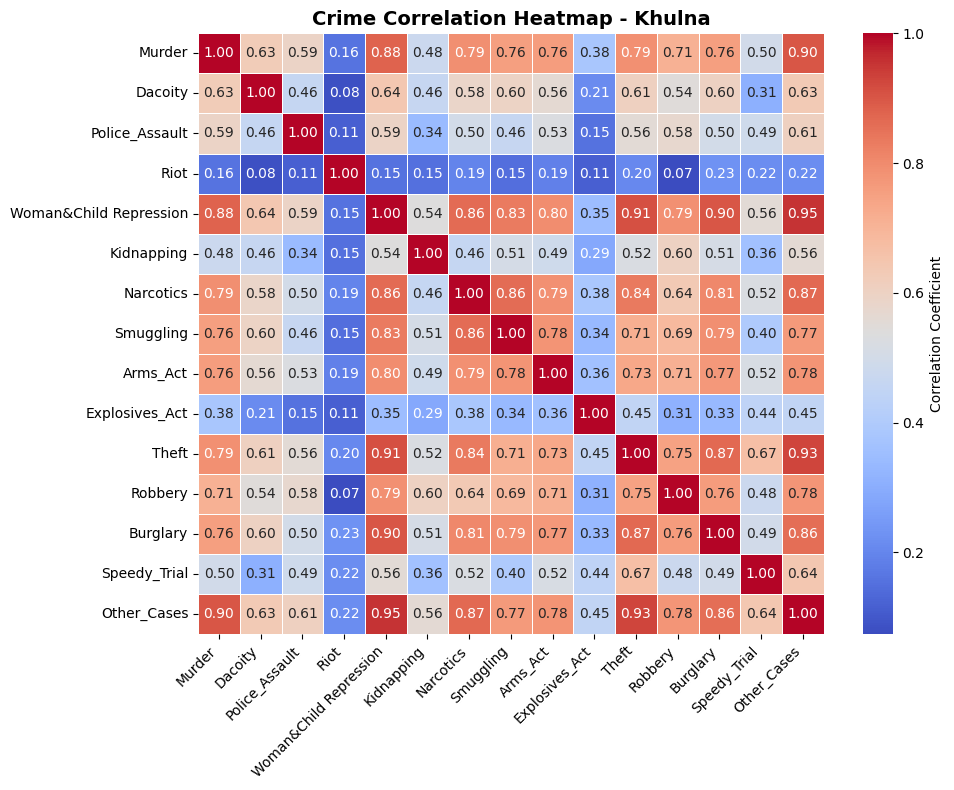


 Processing Correlations for Division: Mymensingh


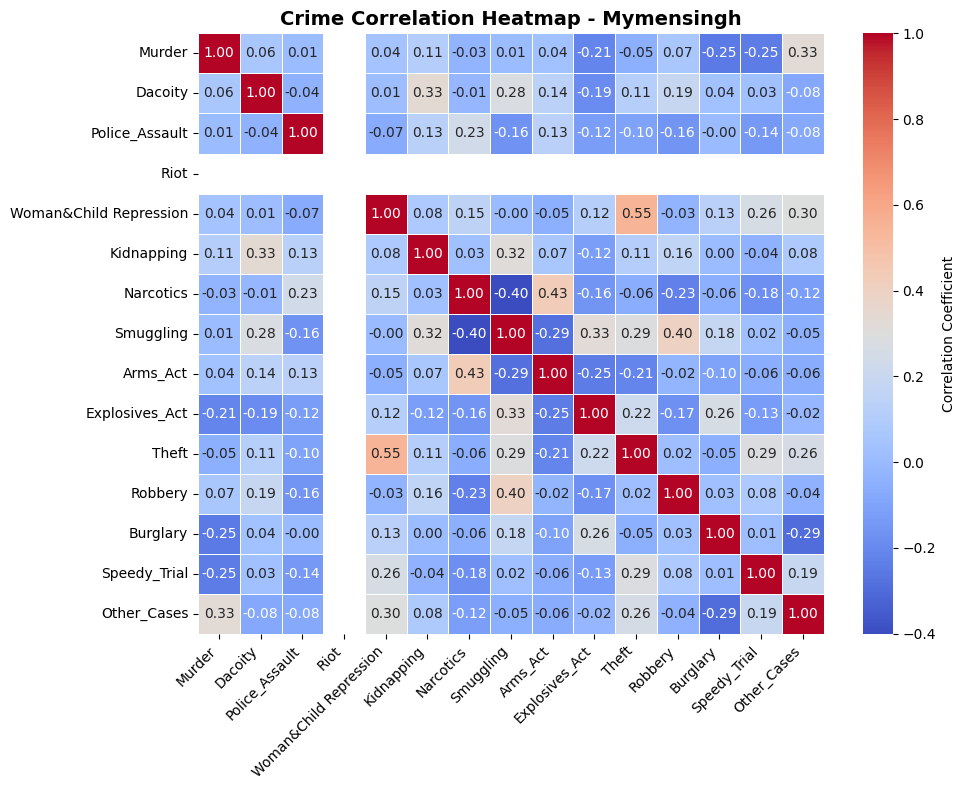


 Processing Correlations for Division: Rajshahi


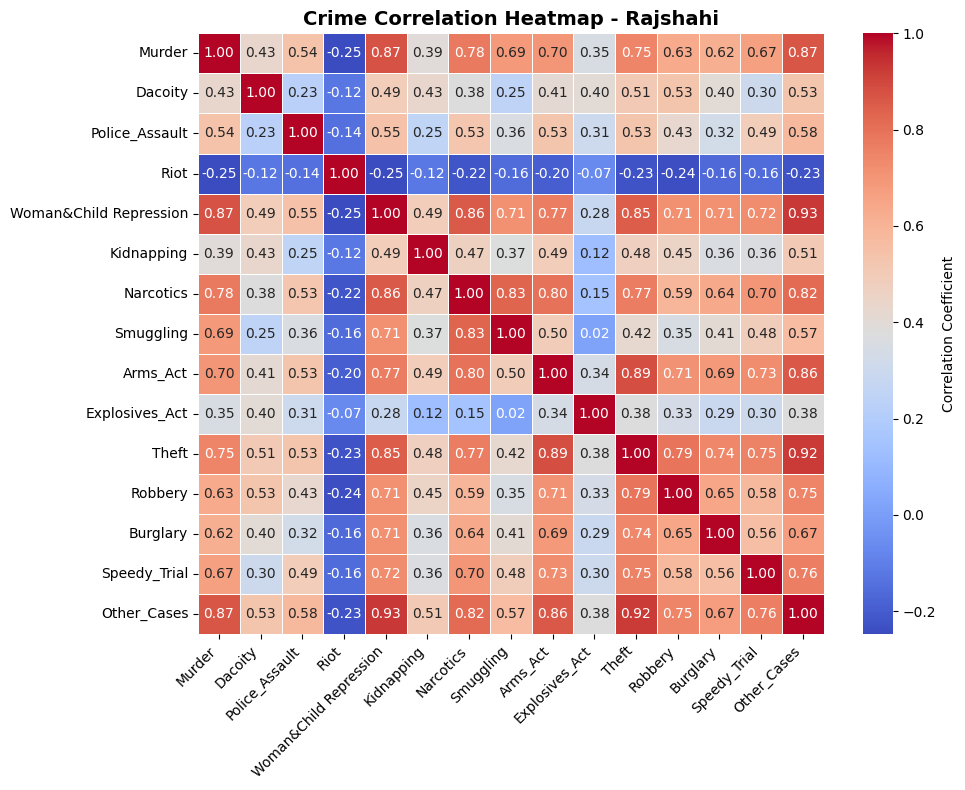


 Processing Correlations for Division: Rangpur


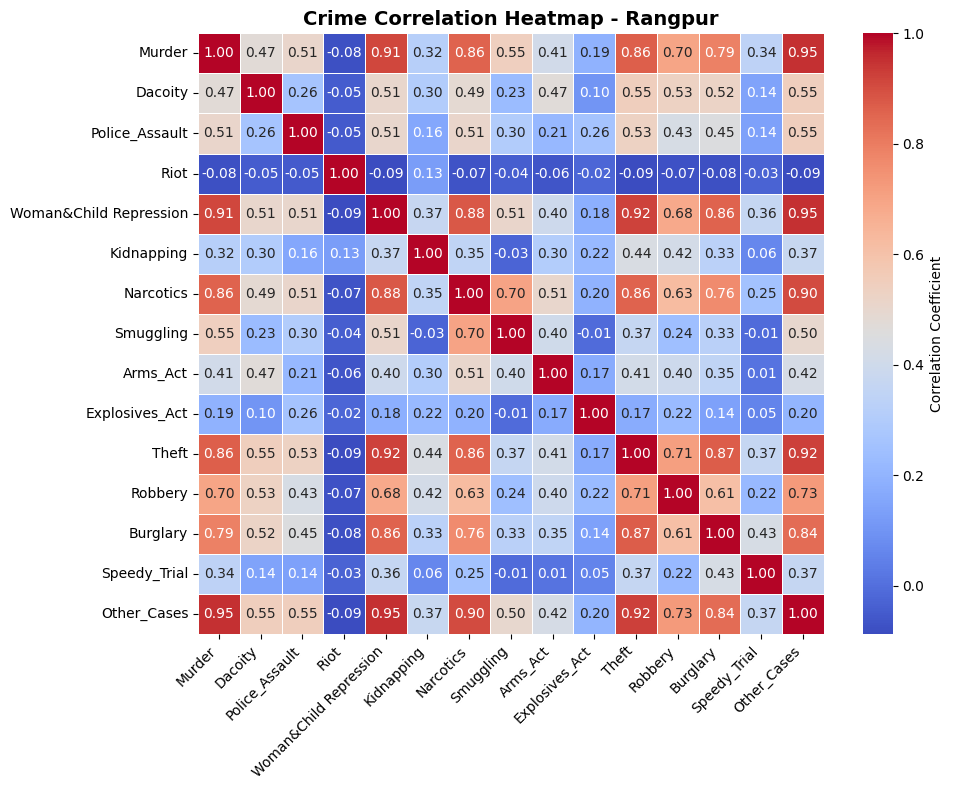


 Processing Correlations for Division: Sylhet


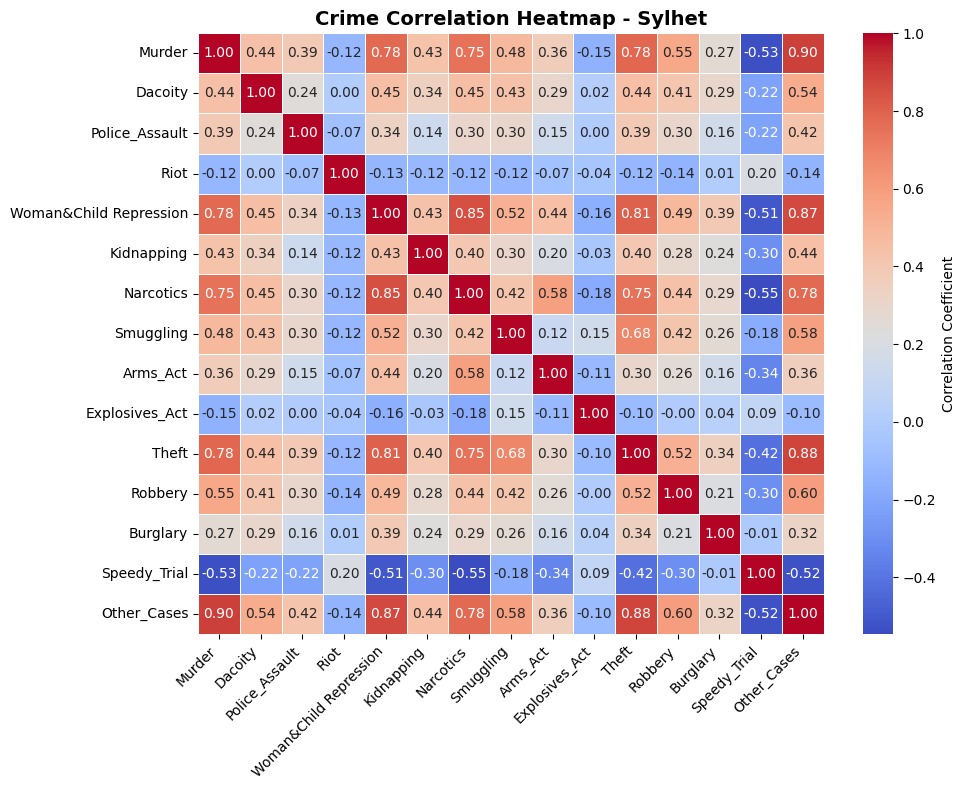

In [ ]:
crime_columns = [
    'Murder', 'Dacoity', 'Police_Assault', 'Riot', 'Woman&Child Repression',
    'Kidnapping', 'Narcotics', 'Smuggling', 'Arms_Act', 'Explosives_Act',
    'Theft', 'Robbery', 'Burglary', 'Speedy_Trial', 'Other_Cases'
]

# Loop over each division
for division, div_data in data.groupby('Mapped_Division'):
    print(f"\n Processing Correlations for Division: {division}")
    
    # Select only the crime columns + drop NaN rows (if any)
    crime_df = div_data[crime_columns].dropna()
    
    if crime_df.empty or crime_df.shape[0] < 5:
        print(f" Skipping {division} (not enough data)")
        continue
    
    # Compute correlation matrix
    corr_matrix = crime_df.corr()
    
    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5,
        cbar_kws={'label': 'Correlation Coefficient'}
    )
    plt.title(f'Crime Correlation Heatmap - {division}', fontsize=14, weight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


**Multi-Crime Clustering**

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.express import bar
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

selected_crimes = [
    'Murder', 'Dacoity', 'Police_Assault', 'Riot', 'Woman&Child Repression',
    'Kidnapping', 'Narcotics', 'Smuggling', 'Arms_Act', 'Explosives_Act',
    'Theft', 'Robbery', 'Burglary', 'Speedy_Trial', 'Other_Cases'
]

data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year

all_results = []
color_map = {
    'violent_crime': 'red',
    'narcotics_crime': 'blue',
    'low_crime': 'green',
    'mixed': 'purple'
}

for division, div_data in data.groupby('Mapped_Division'):
    print(f"\n Processing Division: {division}")

    yearly_pca_data = []
    years = []

    for year, year_data in div_data.groupby('Year'):
        print(f" Year: {year}")

        crime_time_df = year_data.groupby('Date')[selected_crimes].sum()
        if len(crime_time_df) < 4:
            print(f" Skipping {year} (not enough monthly data)")
            continue

        scaler = StandardScaler()
        crime_scaled = scaler.fit_transform(crime_time_df)

        kmeans = KMeans(n_clusters=4, random_state=42)
        kmeans_labels = kmeans.fit_predict(crime_scaled)
        crime_time_df['KMeans_Cluster'] = kmeans_labels

        def label_cluster(row):
            dominant = row.nlargest(3).index.tolist()
            if any(c in dominant for c in ['Narcotics', 'Smuggling', 'Arms_Act']):
                return 'narcotics_crime'
            elif any(c in dominant for c in ['Murder', 'Dacoity', 'Robbery', 'Kidnapping',
                                             'Police_Assault', 'Woman&Child Repression', 'Explosives_Act']):
                return 'violent_crime'
            elif any(c in dominant for c in ['Theft', 'Burglary', 'Other_Cases', 'Riot', 'Speedy_Trial']):
                return 'low_crime'
            else:
                return 'mixed'

        centroids = pd.DataFrame(kmeans.cluster_centers_, columns=selected_crimes)
        kmeans_cluster_labels = centroids.apply(label_cluster, axis=1)
        crime_time_df['KMeans_Label'] = crime_time_df['KMeans_Cluster'].map(dict(enumerate(kmeans_cluster_labels)))

        crime_time_df = crime_time_df.reset_index()
        crime_time_df['Division'] = division
        crime_time_df['Year'] = year
        all_results.append(crime_time_df)

        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(crime_scaled)

        pca_df = pd.DataFrame({
            'PCA1': pca_result[:, 0],
            'PCA2': pca_result[:, 1],
            'Cluster': crime_time_df['KMeans_Label']
        })

        yearly_pca_data.append(pca_df)
        years.append(str(year))

        score = silhouette_score(crime_scaled, kmeans_labels)
        print(f"  ✅ Silhouette Score: {score:.3f}")

    if yearly_pca_data:
        n_years = len(years)
        fig = make_subplots(rows=1, cols=n_years, subplot_titles=years)

        legend_shown = set()
        for idx, pca_df in enumerate(yearly_pca_data):
            for cluster_label in pca_df['Cluster'].unique():
                cluster_data = pca_df[pca_df['Cluster'] == cluster_label]
                fig.add_trace(
                    go.Scatter(
                        x=cluster_data['PCA1'],
                        y=cluster_data['PCA2'],
                        mode='markers',
                        marker=dict(size=8, color=color_map.get(cluster_label, 'gray')),
                        name=cluster_label,
                        legendgroup=cluster_label,
                        showlegend=(cluster_label not in legend_shown)
                    ),
                    row=1, col=idx + 1
                )
                legend_shown.add(cluster_label)

        fig.update_layout(
            width=300 * n_years,
            height=500,
            title_text=f"PCA Plots for {division} (2019–2024)",
            title_x=0.5
        )
        fig.show()

# Combine all clustering results
final_clustered_data = pd.concat(all_results)

# Summarize total record counts per division and cluster label
cluster_summary = (
    final_clustered_data.groupby(['Division', 'KMeans_Label'])
    .size()
    .reset_index(name='Record_Count')
)

# Plot interactive stacked bar graph for cluster distributions
fig_bar = bar(
    cluster_summary,
    x='Division',
    y='Record_Count',
    color='KMeans_Label',
    title='Total Records by Cluster Label per Division (2019–2024)',
    labels={'Record_Count': 'Number of Records', 'KMeans_Label': 'Cluster Label'},
    height=600,
    color_discrete_map=color_map
)

fig_bar.update_layout(barmode='stack', xaxis={'categoryorder': 'total descending'})
fig_bar.show()

# Merge with shapefile for Kepler export
gdf['ADM1_EN'] = gdf['ADM1_EN'].str.strip().str.title()
gdf['centroid'] = gdf.geometry.centroid
gdf['lon'] = gdf.centroid.x
gdf['lat'] = gdf.centroid.y

kepler_data = final_clustered_data[['Date', 'Division', 'KMeans_Label']].copy()
coords_df = gdf[['ADM1_EN', 'lon', 'lat']].rename(columns={'ADM1_EN': 'Division'})
kepler_data = kepler_data.merge(coords_df, on='Division', how='left')
kepler_data.to_csv("E:/Unofficial Thesis/Crime spot/Spatio_temporal/division_cluster_yearly_kepler.csv", index=False)



 Processing Division: Barisal
 Year: 2019
  ✅ Silhouette Score: 0.238
 Year: 2020
  ✅ Silhouette Score: 0.090
 Year: 2021
  ✅ Silhouette Score: 0.111
 Year: 2022
  ✅ Silhouette Score: 0.038
 Year: 2023
  ✅ Silhouette Score: 0.054
 Year: 2024
  ✅ Silhouette Score: 0.171
 Year: 2025
 Skipping 2025 (not enough monthly data)


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai


 Processing Division: Chittagong
 Year: 2019
  ✅ Silhouette Score: 0.228
 Year: 2020
  ✅ Silhouette Score: 0.140
 Year: 2021
  ✅ Silhouette Score: 0.115
 Year: 2022
  ✅ Silhouette Score: 0.082
 Year: 2023
  ✅ Silhouette Score: 0.021
 Year: 2024


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

  ✅ Silhouette Score: 0.118
 Year: 2025
 Skipping 2025 (not enough monthly data)



 Processing Division: Dhaka
 Year: 2019
  ✅ Silhouette Score: 0.165
 Year: 2020
  ✅ Silhouette Score: 0.224
 Year: 2021
  ✅ Silhouette Score: 0.130
 Year: 2022
  ✅ Silhouette Score: 0.058
 Year: 2023
  ✅ Silhouette Score: 0.181
 Year: 2024
  ✅ Silhouette Score: 0.138
 Year: 2025
 Skipping 2025 (not enough monthly data)


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai


 Processing Division: Khulna
 Year: 2019
  ✅ Silhouette Score: 0.127
 Year: 2020
  ✅ Silhouette Score: 0.183
 Year: 2021
  ✅ Silhouette Score: 0.148
 Year: 2022
  ✅ Silhouette Score: 0.090
 Year: 2023
  ✅ Silhouette Score: 0.125
 Year: 2024
  ✅ Silhouette Score: 0.113
 Year: 2025
 Skipping 2025 (not enough monthly data)


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.




 Processing Division: Mymensingh
 Year: 2019
  ✅ Silhouette Score: 0.150
 Year: 2020
  ✅ Silhouette Score: 0.120
 Year: 2021
  ✅ Silhouette Score: 0.068
 Year: 2022
  ✅ Silhouette Score: 0.096
 Year: 2023
  ✅ Silhouette Score: 0.007
 Year: 2024
  ✅ Silhouette Score: 0.071
 Year: 2025
 Skipping 2025 (not enough monthly data)


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.




 Processing Division: Rajshahi
 Year: 2019
  ✅ Silhouette Score: 0.221
 Year: 2020
  ✅ Silhouette Score: 0.034
 Year: 2021
  ✅ Silhouette Score: 0.113
 Year: 2022
  ✅ Silhouette Score: 0.033
 Year: 2023
  ✅ Silhouette Score: 0.144
 Year: 2024


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

  ✅ Silhouette Score: 0.168
 Year: 2025
 Skipping 2025 (not enough monthly data)



 Processing Division: Rangpur
 Year: 2019


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

  ✅ Silhouette Score: 0.097
 Year: 2020
  ✅ Silhouette Score: 0.178
 Year: 2021
  ✅ Silhouette Score: 0.145
 Year: 2022
  ✅ Silhouette Score: 0.139
 Year: 2023
  ✅ Silhouette Score: 0.064
 Year: 2024
  ✅ Silhouette Score: 0.074
 Year: 2025
 Skipping 2025 (not enough monthly data)


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.




 Processing Division: Sylhet
 Year: 2019
  ✅ Silhouette Score: 0.194
 Year: 2020
  ✅ Silhouette Score: 0.117
 Year: 2021
  ✅ Silhouette Score: 0.118
 Year: 2022
  ✅ Silhouette Score: 0.106
 Year: 2023
  ✅ Silhouette Score: 0.033
 Year: 2024
  ✅ Silhouette Score: 0.065
 Year: 2025
 Skipping 2025 (not enough monthly data)


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

C:\Users\User\AppData\Local\Temp\ipykernel_16088\226396419.py:142: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\User\AppData\Local\Temp\ipykernel_16088\226396419.py:143: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\User\AppData\Local\Temp\ipykernel_16088\226396419.py:144: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




**Static Choropleths Graph**

C:\Users\User\AppData\Local\Temp\ipykernel_16088\3166467653.py:39: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




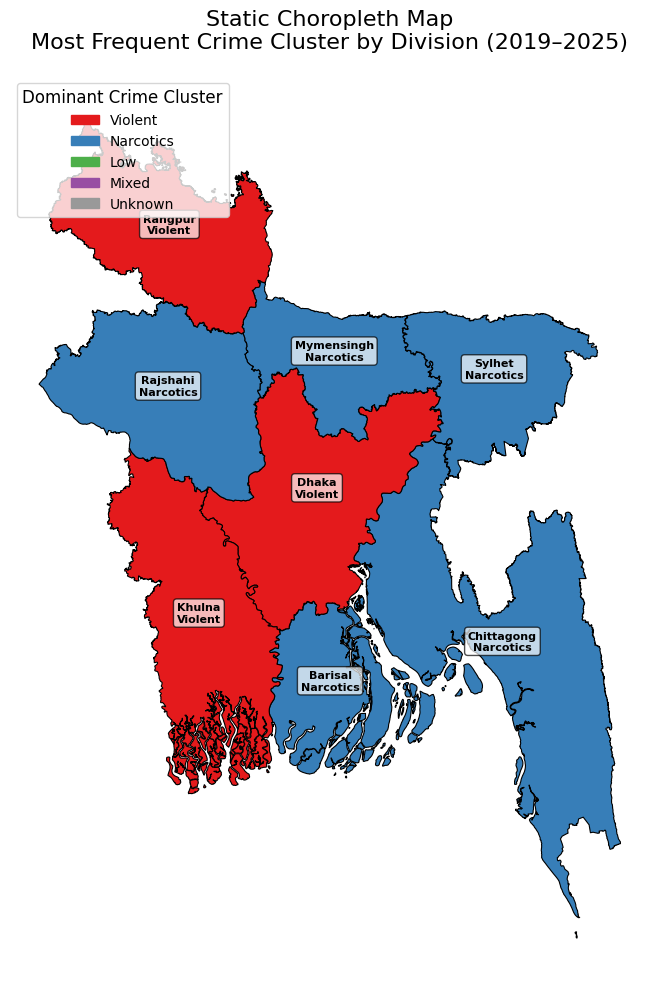

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

gdf['ADM1_EN'] = gdf['ADM1_EN'].str.strip().str.title()

division_cluster_labels = (
    final_clustered_data.groupby('Division')['KMeans_Label']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'unknown')
    .reset_index()
)

choropleth_df = gdf.merge(
    division_cluster_labels,
    left_on='ADM1_EN',
    right_on='Division',
    how='left'
)

label_colors = {
    'violent_crime': '#e41a1c',
    'narcotics_crime': '#377eb8',
    'low_crime': '#4daf4a',
    'mixed': '#984ea3',
    'unknown': '#999999'
}
choropleth_df['color'] = choropleth_df['KMeans_Label'].map(label_colors)

fig, ax = plt.subplots(1, 1, figsize=(14, 10))

choropleth_df.plot(
    color=choropleth_df['color'],
    edgecolor='black',
    linewidth=0.8,
    ax=ax
)

choropleth_df['centroid'] = choropleth_df.geometry.centroid
for idx, row in choropleth_df.iterrows():
    if pd.notnull(row['KMeans_Label']):
        ax.text(
            row['centroid'].x, row['centroid'].y,
            f"{row['Division']}\n{row['KMeans_Label'].replace('_crime', '').title()}",
            horizontalalignment='center',
            fontsize=8,
            weight='bold',
            bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3')
        )

legend_patches = [
    mpatches.Patch(color=color, label=label.replace('_crime', '').title())
    for label, color in label_colors.items()
]

plt.legend(handles=legend_patches, title='Dominant Crime Cluster', loc='upper left', fontsize=10, title_fontsize=12)

plt.title("Static Choropleth Map\nMost Frequent Crime Cluster by Division (2019–2025)", fontsize=16, pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()


**Heatmap for Clustering Every division**


 Reconstructed summary DataFrame:
      Division  Year     KMeans_Label
0      Barisal  2019    violent_crime
1      Barisal  2020  narcotics_crime
2      Barisal  2021  narcotics_crime
3      Barisal  2022  narcotics_crime
4      Barisal  2023  narcotics_crime
5      Barisal  2024  narcotics_crime
6   Chittagong  2019  narcotics_crime
7   Chittagong  2020    violent_crime
8   Chittagong  2021    violent_crime
9   Chittagong  2022  narcotics_crime
10  Chittagong  2023  narcotics_crime
11  Chittagong  2024  narcotics_crime
12       Dhaka  2019  narcotics_crime
13       Dhaka  2020    violent_crime
14       Dhaka  2021    violent_crime
15       Dhaka  2022    violent_crime
16       Dhaka  2023    violent_crime
17       Dhaka  2024  narcotics_crime
18      Khulna  2019    violent_crime
19      Khulna  2020    violent_crime
20      Khulna  2021    violent_crime
21      Khulna  2022    violent_crime
22      Khulna  2023    violent_crime
23      Khulna  2024  narcotics_crime
24  Mymensingh 

C:\Users\User\AppData\Local\Temp\ipykernel_16088\2172863279.py:32: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



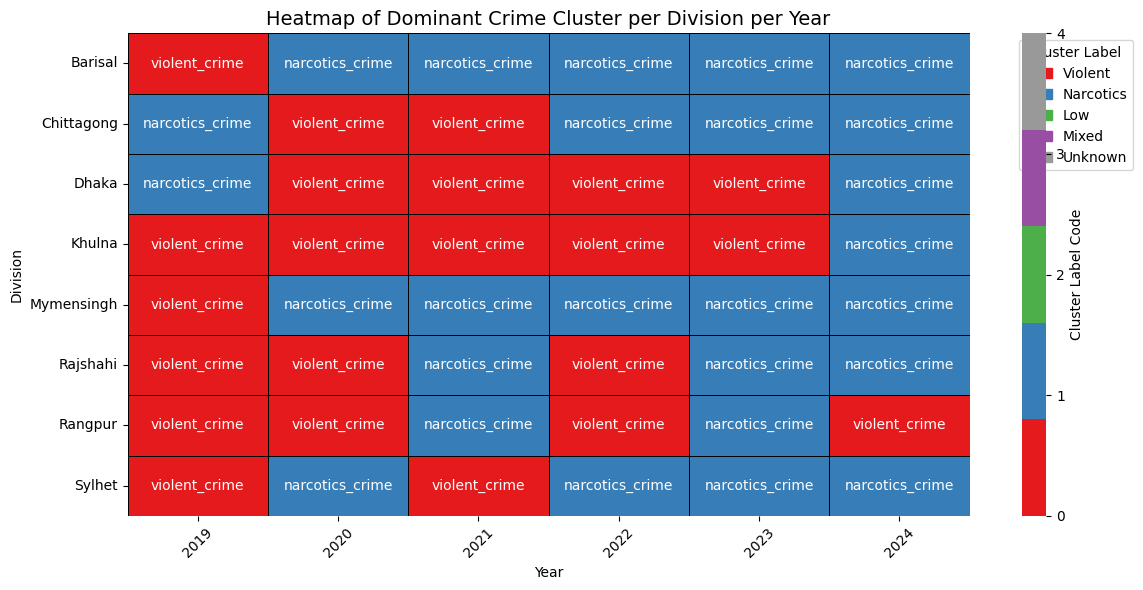

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

summary_df = (
    final_clustered_data.groupby(['Division', 'Year'])['KMeans_Label']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'unknown')
    .reset_index()
)

print("\n Reconstructed summary DataFrame:")
print(summary_df)

pivot_table = summary_df.pivot(index='Division', columns='Year', values='KMeans_Label')

print("\n Pivot Table (Division × Year):")
print(pivot_table)

label_to_code = {
    'violent_crime': 0,
    'narcotics_crime': 1,
    'low_crime': 2,
    'mixed': 3,
    'unknown': 4
}

code_to_label = {v: k.replace('_crime', '').title() for k, v in label_to_code.items()}

# Create numeric pivot for heatmap
pivot_numeric = pivot_table.replace(label_to_code)

color_list = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#999999']
cmap = ListedColormap(color_list)

plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_numeric,
    annot=pivot_table,           # Show original text labels
    fmt='',                      # No numeric formatting
    cmap=cmap,
    vmin=0, vmax=4,              # Lock color range to 0-4
    cbar_kws={'ticks': list(label_to_code.values()), 'label': 'Cluster Label Code'},
    linewidths=0.5,
    linecolor='black'
)

# Set tick rotations and title
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.title("Heatmap of Dominant Crime Cluster per Division per Year", fontsize=14)

legend_patches = [Patch(color=color, label=label) for label, color in zip(code_to_label.values(), color_list)]
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', title='Cluster Label')

plt.tight_layout()
plt.show()


**Crime Percentage for Every Divisions Cluster** 


 Division: Barisal → Main Cluster: narcotics_crime

 Division: Chittagong → Main Cluster: narcotics_crime

 Division: Dhaka → Main Cluster: violent_crime

 Division: Khulna → Main Cluster: violent_crime

 Division: Mymensingh → Main Cluster: narcotics_crime

 Division: Rajshahi → Main Cluster: narcotics_crime

 Division: Rangpur → Main Cluster: violent_crime

 Division: Sylhet → Main Cluster: narcotics_crime


C:\Users\User\AppData\Local\Temp\ipykernel_16088\302962130.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\User\AppData\Local\Temp\ipykernel_16088\302962130.py:73: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\User\AppData\Local\Temp\ipykernel_16088\302962130.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\User\AppData\Local\Temp\ipykernel_16088\302962130.py:73: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\User\AppData\Local\Temp\ipykernel_16088\302962130.py:63: FutureWarning:



Passing `palette` with

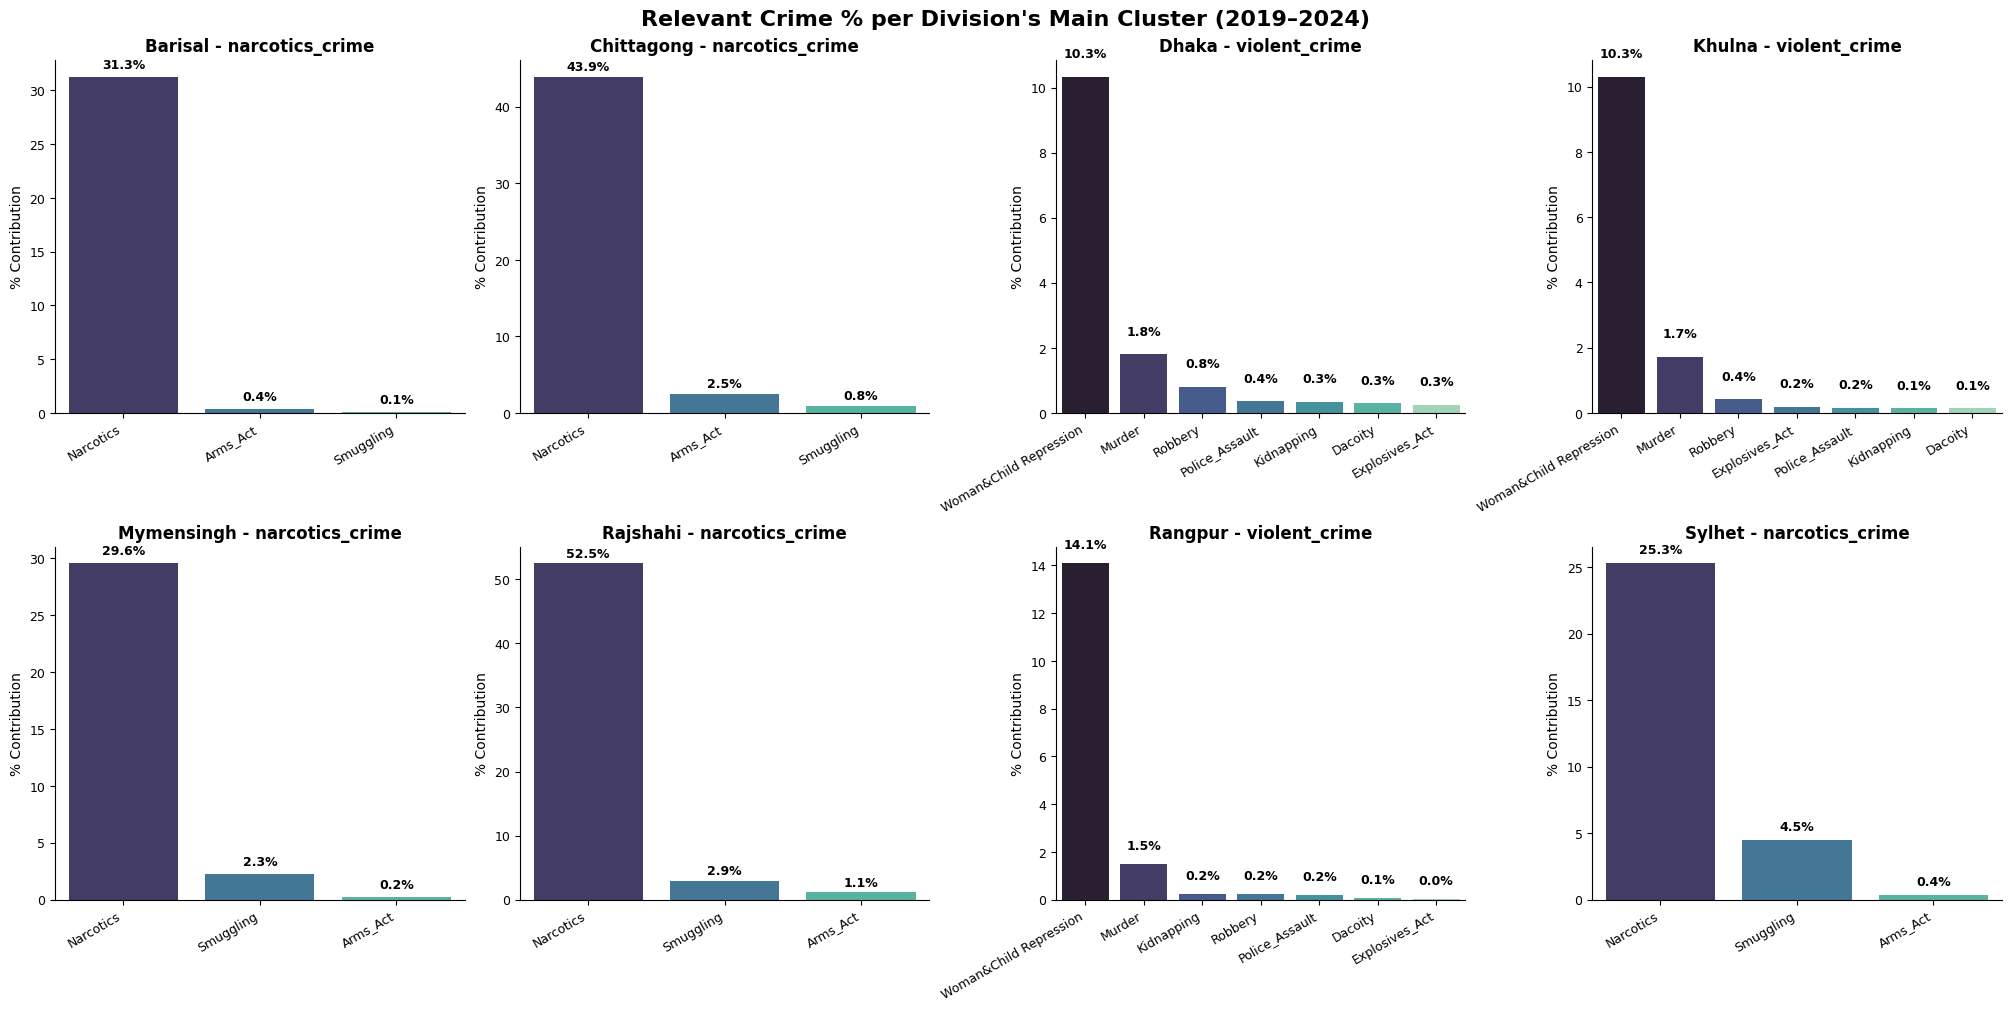


 Crime % per Division's Main Cluster (Relevant Crimes Only):
     Division     Main_Cluster  Narcotics  Arms_Act  Smuggling  \
0     Barisal  narcotics_crime      31.27      0.39       0.08   
1  Chittagong  narcotics_crime      43.91      2.51       0.84   
2       Dhaka    violent_crime        NaN       NaN        NaN   
3      Khulna    violent_crime        NaN       NaN        NaN   
4  Mymensingh  narcotics_crime      29.55      0.25       2.29   
5    Rajshahi  narcotics_crime      52.49      1.12       2.90   
6     Rangpur    violent_crime        NaN       NaN        NaN   
7      Sylhet  narcotics_crime      25.27      0.38       4.48   

   Woman&Child Repression  Murder  Robbery  Police_Assault  Kidnapping  \
0                     NaN     NaN      NaN             NaN         NaN   
1                     NaN     NaN      NaN             NaN         NaN   
2                   10.33    1.80     0.80            0.36        0.35   
3                   10.31    1.73     0.42     

In [ ]:
import math
crime_features = selected_crimes

cluster_crime_map = {
    'narcotics_crime': ['Narcotics', 'Smuggling', 'Arms_Act'],
    'violent_crime': ['Murder', 'Dacoity', 'Robbery', 'Kidnapping','Police_Assault','Woman&Child Repression','Explosives_Act'],
    'low_crime': ['Theft','Burglary','Other_Cases','Riot','Speedy_Trial']
}

plot_data = []
main_cluster_results = []

for _, row in division_cluster_labels.iterrows():
    division = row['Division']
    main_cluster = row['KMeans_Label']
    
    print(f"\n Division: {division} → Main Cluster: {main_cluster}")
    
    df_filtered = final_clustered_data[
        (final_clustered_data['Division'] == division) &
        (final_clustered_data['KMeans_Label'] == main_cluster)
    ]
    
    if df_filtered.empty:
        print(f" No data for {division} + {main_cluster}")
        continue
    
    # Sum crimes
    total_crimes = df_filtered[crime_features].sum()
    
    percent_crimes = (total_crimes / total_crimes.sum()) * 100
    percent_crimes_sorted = percent_crimes.sort_values(ascending=False)
    
    #  Filter only relevant crimes for this cluster
    relevant_crimes = cluster_crime_map.get(main_cluster, percent_crimes_sorted.index.tolist())
    filtered_percent_crimes = percent_crimes_sorted[percent_crimes_sorted.index.isin(relevant_crimes)]
    
    plot_data.append({
        'Division': division,
        'Main_Cluster': main_cluster,
        'Percent_Crimes': filtered_percent_crimes
    })
    
    # Save for table
    main_cluster_results.append({
        'Division': division,
        'Main_Cluster': main_cluster,
        **filtered_percent_crimes.round(2).to_dict()
    })

num_divisions = len(plot_data)
cols = 4  # adjust number of columns here
rows = math.ceil(num_divisions / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*5), constrained_layout=True)

# flatten axes for easy indexing
axes = axes.flatten()

for i, data in enumerate(plot_data):
    ax = axes[i]
    
    sns.barplot(
        x=data['Percent_Crimes'].index,
        y=data['Percent_Crimes'].values,
        palette=sns.color_palette("mako", len(data['Percent_Crimes'])),
        ax=ax
    )
    
    ax.set_title(f"{data['Division']} - {data['Main_Cluster']}", fontsize=12, weight='bold')
    ax.set_ylabel("% Contribution", fontsize=10)
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=9)
    ax.tick_params(axis='y', labelsize=9)
    
    # annotate bars
    for bar in ax.patches:
        ax.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height() + 0.5,
            f"{bar.get_height():.1f}%",
            ha='center', va='bottom', fontsize=9, weight='bold'
        )
    
    sns.despine(ax=ax)

# remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Relevant Crime % per Division's Main Cluster (2019–2024)", fontsize=16, weight='bold')
plt.show()


main_cluster_df = pd.DataFrame(main_cluster_results)

print("\n Crime % per Division's Main Cluster (Relevant Crimes Only):")
print(main_cluster_df)

main_cluster_df.to_csv("E:/Unofficial Thesis/Crime spot/Spatio_temporal/main_cluster_relevant_crime_percentage_per_division.csv", index=False)
print("\n Table exported.")


In [ ]:
crime_cause_solution_dict = {
    'Murder': {
        'cause': 'Linked to land disputes, political rivalries, personal vendettas; worsened by socioeconomic disparities and weak law enforcement.',
        'solution': 'Implement community policing, enhance dispute resolution, strengthen the judicial system for swift justice.'
    },
    'Dacoity': {
        'cause': 'Driven by economic hardship, unemployment, and the lure of quick financial gain.',
        'solution': 'Enhance employment opportunities, community development, increase surveillance in vulnerable areas.'
    },
    'Police_Assault': {
        'cause': 'Public distrust, perceived corruption, and lack of accountability leading to confrontations.',
        'solution': 'Implement police reforms, promote transparency, foster community engagement.'
    },
    'Riot': {
        'cause': 'Triggered by political unrest, religious tensions, and social inequalities; worsened by lack of conflict resolution.',
        'solution': 'Establish early warning systems, promote interfaith dialogues, strengthen community relations.'
    },
    'Woman&Child Repression': {
        'cause': 'Fueled by patriarchal norms, lack of education, and inadequate legal protections.',
        'solution': 'Implement education programs on gender equality, enforce strict laws, provide victim support services.'
    },
    'Kidnapping': {
        'cause': 'Motivated by ransom, human trafficking, political coercion; worsened by weak law enforcement.',
        'solution': 'Strengthen law enforcement, improve intelligence gathering, expedite judicial processes.'
    },
    'Narcotics': {
        'cause': 'Bangladesh’s transit-point geography, socioeconomic factors, youth unemployment, rising drug abuse.',
        'solution': 'Enhance border security, conduct public awareness campaigns, provide rehabilitation programs.'
    },
    'Smuggling': {
        'cause': 'Porous borders, corruption, high demand for contraband goods, lack of coordinated border management.',
        'solution': 'Implement advanced surveillance, foster international cooperation, strengthen customs enforcement.'
    },
    'Arms_Act': {
        'cause': 'Illegal arms trafficking, political instability, inadequate regulatory frameworks.',
        'solution': 'Tighten arms control laws, enhance monitoring, conduct regular audits of licensed arms holders.'
    },
    'Explosives_Act': {
        'cause': 'Linked to terrorism, political violence, illegal mining; worsened by weak regulatory oversight.',
        'solution': 'Strengthen legal frameworks, improve monitoring of explosives, conduct public awareness campaigns.'
    },
    'Theft': {
        'cause': 'Economic disparities, unemployment, drug addiction.',
        'solution': 'Implement community policing, enhance street lighting, promote neighborhood watch programs.'
    },
    'Robbery': {
        'cause': 'Economic disparities, unemployment, drug addiction.',
        'solution': 'Implement community policing, enhance street lighting, promote neighborhood watch programs.'
    },
    'Burglary': {
        'cause': 'Economic disparities, unemployment, drug addiction.',
        'solution': 'Implement community policing, enhance street lighting, promote neighborhood watch programs.'
    },
    'Speedy_Trial': {
        'cause': 'Backlog of cases, slow judicial processes, sometimes compromising due process.',
        'solution': 'Judicial reforms, increase number of courts, employ alternative dispute resolution methods.'
    },
    'Other_Cases': {
        'cause': 'Miscellaneous crimes, including cybercrime and white-collar offenses, arising from diverse socio-political and economic factors.',
        'solution': 'Develop specialized units for emerging crime trends, invest in technology, enhance inter-agency coordination.'
    }
}

top_crimes_list = []
causes_list = []
solutions_list = []

for idx, row in main_cluster_df.iterrows():
    crime_percents = row[row.map(lambda x: isinstance(x, (int, float)))].dropna()
    
    # pick top 3 crimes
    top_crimes = crime_percents.sort_values(ascending=False).head(3).index.tolist()
    
    causes = []
    solutions = []
    for crime in top_crimes:
        entry = crime_cause_solution_dict.get(crime, {'cause': 'Unknown cause', 'solution': 'No solution available'})
        causes.append(entry['cause'])
        solutions.append(entry['solution'])
    
    top_crimes_list.append(', '.join(top_crimes))
    causes_list.append('; '.join(causes))
    solutions_list.append('; '.join(solutions))

main_cluster_df['Top_Crimes'] = top_crimes_list
main_cluster_df['Generated_Cause'] = causes_list
main_cluster_df['Suggested_Solution'] = solutions_list

print("\n Final Table with Cause & Solution:")
print(main_cluster_df[['Division', 'Main_Cluster', 'Top_Crimes', 'Generated_Cause', 'Suggested_Solution']])

main_cluster_df.to_csv("E:/Unofficial Thesis/Crime spot/Spatio_temporal/main_cluster_with_cause_solution.csv", index=False)

# Display interactive styled HTML table
styled_table = main_cluster_df[['Division', 'Main_Cluster', 'Top_Crimes', 'Generated_Cause', 'Suggested_Solution']] \
    .style.set_table_styles([
        {'selector': 'th', 'props': [('font-size', '12pt'), ('background-color', '#f0f0f0')]}
    ]).set_properties(**{'text-align': 'left', 'font-size': '11pt'}) \
    .applymap(lambda v: 'font-weight: bold;' if isinstance(v, str) and 'crime' in v else '')

styled_table.to_html("E:/Unofficial Thesis/Crime spot/Spatio_temporal/summary_table_with_cause_solution.html")



 Final Table with Cause & Solution:
     Division     Main_Cluster                                  Top_Crimes  \
0     Barisal  narcotics_crime              Narcotics, Arms_Act, Smuggling   
1  Chittagong  narcotics_crime              Narcotics, Arms_Act, Smuggling   
2       Dhaka    violent_crime     Woman&Child Repression, Murder, Robbery   
3      Khulna    violent_crime     Woman&Child Repression, Murder, Robbery   
4  Mymensingh  narcotics_crime              Narcotics, Smuggling, Arms_Act   
5    Rajshahi  narcotics_crime              Narcotics, Smuggling, Arms_Act   
6     Rangpur    violent_crime  Woman&Child Repression, Murder, Kidnapping   
7      Sylhet  narcotics_crime              Narcotics, Smuggling, Arms_Act   

                                     Generated_Cause  \
0  Bangladesh’s transit-point geography, socioeco...   
1  Bangladesh’s transit-point geography, socioeco...   
2  Fueled by patriarchal norms, lack of education...   
3  Fueled by patriarchal norms, lack

C:\Users\User\AppData\Local\Temp\ipykernel_16088\3667025141.py:99: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



**Animated Choropleth graph with Bangladesh Divisions**

In [ ]:
# #  Yearly Division Clustering Map by Year (Dropdown)

# import pandas as pd
# import geopandas as gpd
# import folium
# from folium.features import GeoJsonTooltip
# import ipywidgets as widgets
# from IPython.display import display, clear_output

# # Step 1: Load Data
# final_clustered_data = pd.read_csv(
#     "E:/Unofficial Thesis/Crime spot/Spatio_temporal/division_cluster_yearly_kepler.csv",
#     parse_dates=['Date']
# )
# final_clustered_data['Year'] = final_clustered_data['Date'].dt.year

# #gdf = gpd.read_file("E:/Unofficial Thesis/Crime spot/geo 1/bgd_admbnda_adm1_bbs_20201113.shp")
# gdf['ADM1_EN'] = gdf['ADM1_EN'].str.strip().str.title()
# gdf = gdf.to_crs(epsg=4326)

# # Step 2: Define Cluster Colors
# label_colors = {
#     'violent_crime': '#e41a1c', 'narcotics_crime': '#377eb8',
#     'social_crime': '#ff7f00', 'low_crime': '#4daf4a',
#     'mixed': '#984ea3', 'unknown': '#999999'
# }

# # Step 3: Create Dropdown Widget for Years
# year_options = sorted(final_clustered_data['Year'].unique())
# year_selector = widgets.Dropdown(
#     options=year_options,
#     description='Select Year:',
#     layout=widgets.Layout(width='40%')
# )

# # Update Map on Year Selection

# def update_map(selected_year):
#     clear_output(wait=True)
#     display(year_selector)

#     # Filter data for selected year only
#     filtered_df = final_clustered_data[final_clustered_data['Year'] == selected_year]

#     # Merge with shapefile
#     choropleth_df = gdf.merge(
#         filtered_df[['Division', 'KMeans_Label']],
#         left_on='ADM1_EN', right_on='Division', how='left'
#     )

#     # Drop non-serializable fields (e.g., datetime, Point)
#     choropleth_df = choropleth_df.drop(columns=[
#         col for col in choropleth_df.columns
#         if pd.api.types.is_datetime64_any_dtype(choropleth_df[col]) 
#         or choropleth_df[col].apply(lambda x: isinstance(x, object) and str(type(x)).endswith("Point'>")).any()
#     ], errors='ignore')

#     choropleth_df['color'] = choropleth_df['KMeans_Label'].map(label_colors)

#     m = folium.Map(location=[23.7, 90.4], zoom_start=7)

#     folium.GeoJson(
#         choropleth_df,
#         style_function=lambda feature: {
#             'fillColor': label_colors.get(feature['properties']['KMeans_Label'], 'gray'),
#             'color': 'black',
#             'weight': 1,
#             'fillOpacity': 0.6
#         },
#         tooltip=GeoJsonTooltip(fields=["ADM1_EN", "KMeans_Label"])
#     ).add_to(m)

#     folium.LayerControl().add_to(m)
#     display(m)


# # Link Dropdown to Map
# year_selector.observe(lambda change: update_map(change.new), names='value')

# # Initial map view
# update_map(year_selector.value)


22:20:14 - cmdstanpy - INFO - Chain [1] start processing


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 1
[LightGBM] [Info] Start training from score 14.526603
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

22:20:14 - cmdstanpy - INFO - Chain [1] done processing
22:20:15 - cmdstanpy - INFO - Chain [1] start processing


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 1
[LightGBM] [Info] Start training from score 6.021564
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

22:20:15 - cmdstanpy - INFO - Chain [1] done processing
22:20:15 - cmdstanpy - INFO - Chain [1] start processing


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 1
[LightGBM] [Info] Start training from score 6.001492
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

22:20:15 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
22:20:16 - cmdstanpy - INFO - Chain [1] start processing


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000011 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 1
[LightGBM] [Info] Start training from score 11.170671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

22:20:16 - cmdstanpy - INFO - Chain [1] done processing
22:20:16 - cmdstanpy - INFO - Chain [1] start processing


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 1
[LightGBM] [Info] Start training from score 5.704192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

22:20:16 - cmdstanpy - INFO - Chain [1] done processing
22:20:17 - cmdstanpy - INFO - Chain [1] start processing


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 1
[LightGBM] [Info] Start training from score 4.670673
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

22:20:17 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
22:20:17 - cmdstanpy - INFO - Chain [1] start processing


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 1
[LightGBM] [Info] Start training from score 3.976879
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

22:20:17 - cmdstanpy - INFO - Chain [1] done processing
22:20:18 - cmdstanpy - INFO - Chain [1] start processing


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000011 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 1
[LightGBM] [Info] Start training from score 4.698228
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

22:20:18 - cmdstanpy - INFO - Chain [1] done processing
22:20:18 - cmdstanpy - INFO - Chain [1] start processing


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 1
[LightGBM] [Info] Start training from score 10.035597
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

22:20:18 - cmdstanpy - INFO - Chain [1] done processing


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 1
[LightGBM] [Info] Start training from score 12.358147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

22:20:19 - cmdstanpy - INFO - Chain [1] start processing
22:20:19 - cmdstanpy - INFO - Chain [1] done processing


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 1
[LightGBM] [Info] Start training from score 9.973996
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

22:20:19 - cmdstanpy - INFO - Chain [1] start processing
22:20:20 - cmdstanpy - INFO - Chain [1] done processing


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000010 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 1
[LightGBM] [Info] Start training from score 0.296778
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

22:20:20 - cmdstanpy - INFO - Chain [1] start processing
22:20:20 - cmdstanpy - INFO - Chain [1] done processing


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 1
[LightGBM] [Info] Start training from score 15.387589
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

22:20:21 - cmdstanpy - INFO - Chain [1] start processing
22:20:21 - cmdstanpy - INFO - Chain [1] done processing


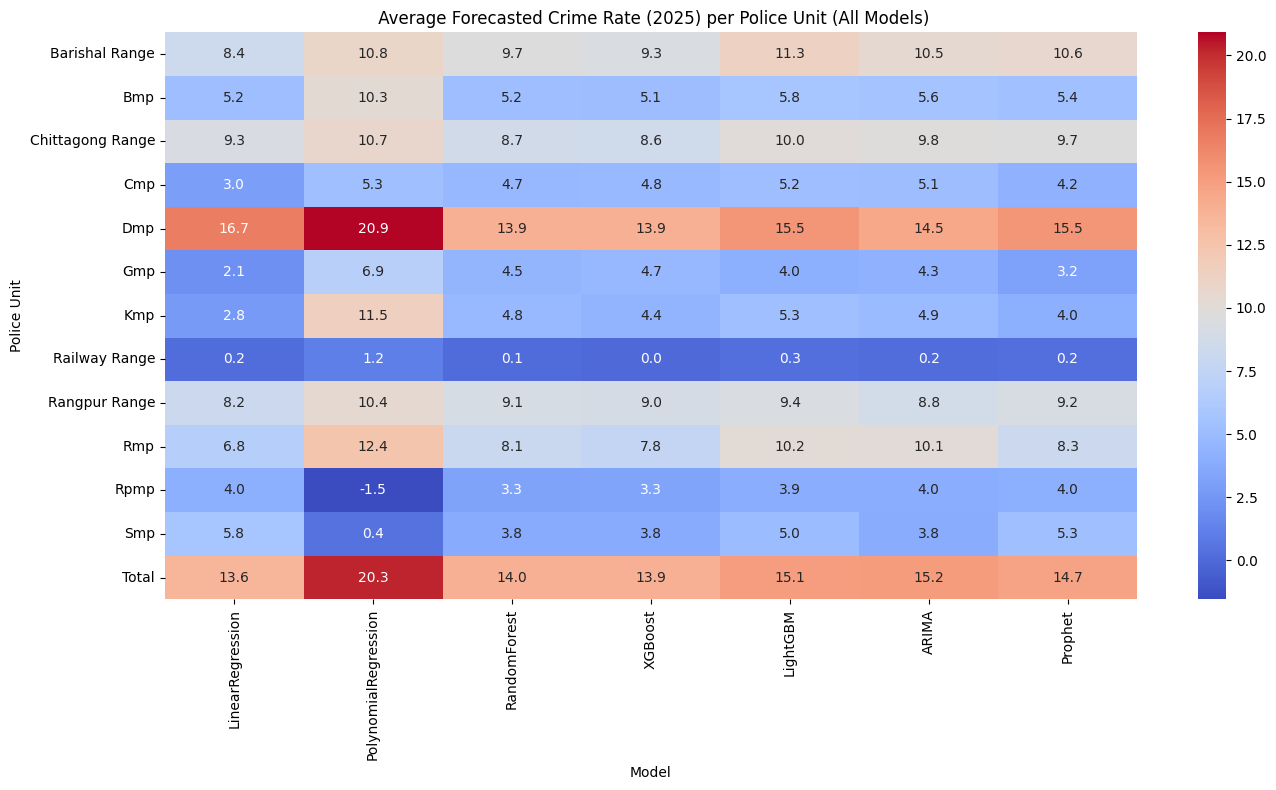

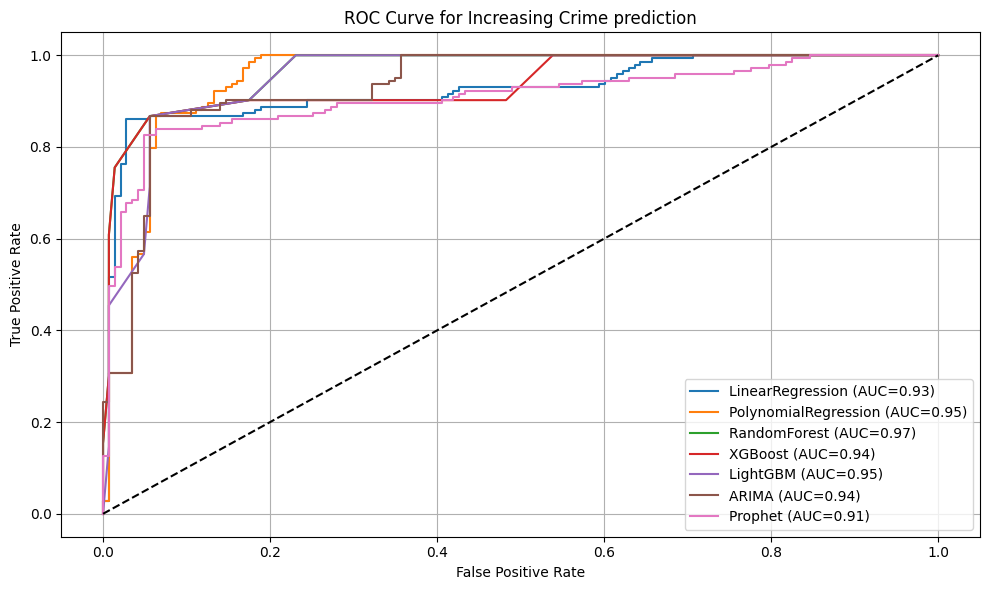

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from prophet import Prophet
import lightgbm as lgb
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import roc_curve, roc_auc_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# === Step 1: Load and Preprocess ===
data = pd.read_excel("Crime_prediction.xlsx")
month_map = {"January": 1, "February": 2, "March": 3, "April": 4,
             "May": 5, "June": 6, "July": 7, "August": 8,
             "September": 9, "October": 10, "November": 11, "December": 12}
data["Month_Num"] = data["Month"].map(month_map)
data["Date"] = pd.to_datetime(dict(year=data["Year"], month=data["Month_Num"], day=1))
data['Total_Population'] = pd.to_numeric(data['Total_Population'], errors='coerce')
data['Crime_Rate_per_100k'] = (data['Total_Cases'] / data['Total_Population']) * 100000
data = data[['Date', 'Names_of_Unit', 'Crime_Rate_per_100k']].dropna()
data['Names_of_Unit'] = data['Names_of_Unit'].str.strip().str.title()

# === Step 2: Forecast 2025 ===
predict_dates_2025 = pd.date_range(start="2025-01-01", end="2025-12-01", freq='MS')
all_forecasts = []
roc_data = []

model_names = ['LinearRegression', 'PolynomialRegression', 'RandomForest',
               'XGBoost', 'LightGBM', 'ARIMA', 'Prophet']

for unit in data['Names_of_Unit'].unique():
    unit_data = data[(data['Names_of_Unit'] == unit) & (data['Date'].dt.year < 2025)].copy()
    unit_data = unit_data.set_index('Date').resample('MS').mean(numeric_only=True).fillna(0).reset_index()
    if len(unit_data) < 24:
        continue

    unit_data['Timestamp'] = unit_data['Date'].map(pd.Timestamp.toordinal)
    X = unit_data[['Timestamp']]
    y = unit_data['Crime_Rate_per_100k']

    #  train-validation split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, shuffle=False)

    # Predict full 2025
    predict_df = pd.DataFrame({'Date': predict_dates_2025})
    predict_df['Timestamp'] = predict_df['Date'].map(pd.Timestamp.toordinal)
    X_predict = predict_df[['Timestamp']]
    unit_forecast = {
        'Date': predict_df['Date'].tolist(),
        'Names_of_Unit': [unit] * len(predict_df)
    }

    # Train models and collect validation scores and 2025 forecasts
    try:
        lin_model = LinearRegression().fit(X_train, y_train)
        unit_forecast['LinearRegression'] = lin_model.predict(X_predict)
        roc_data.append(('LinearRegression', unit, y_val, lin_model.predict(X_val)))
    except: continue

    try:
        poly_model = make_pipeline(PolynomialFeatures(3), LinearRegression()).fit(X_train, y_train)
        unit_forecast['PolynomialRegression'] = poly_model.predict(X_predict)
        roc_data.append(('PolynomialRegression', unit, y_val, poly_model.predict(X_val)))
    except: continue

    try:
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
        unit_forecast['RandomForest'] = rf_model.predict(X_predict)
        roc_data.append(('RandomForest', unit, y_val, rf_model.predict(X_val)))
    except: continue

    try:
        xgb_model = XGBRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
        unit_forecast['XGBoost'] = xgb_model.predict(X_predict)
        roc_data.append(('XGBoost', unit, y_val, xgb_model.predict(X_val)))
    except: continue

    try:
        lgbm_model = lgb.LGBMRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
        unit_forecast['LightGBM'] = lgbm_model.predict(X_predict)
        roc_data.append(('LightGBM', unit, y_val, lgbm_model.predict(X_val)))
    except: continue

    try:
        arima_model = ARIMA(y_train, order=(2, 1, 2)).fit()
        unit_forecast['ARIMA'] = arima_model.forecast(steps=12)
        roc_data.append(('ARIMA', unit, y_val, arima_model.predict(start=X_val.index[0], end=X_val.index[-1])))
    except:
        unit_forecast['ARIMA'] = [np.nan] * 12

    try:
        prophet_df = pd.DataFrame({'ds': X_train['Timestamp'].map(pd.Timestamp.fromordinal), 'y': y_train})
        prophet_model = Prophet()
        prophet_model.fit(prophet_df)
        future = prophet_model.make_future_dataframe(periods=12, freq='MS')
        forecast = prophet_model.predict(future)
        unit_forecast['Prophet'] = forecast.tail(12)['yhat'].values
        val_df = pd.DataFrame({'ds': X_val['Timestamp'].map(pd.Timestamp.fromordinal)})
        val_pred = prophet_model.predict(val_df)['yhat']
        roc_data.append(('Prophet', unit, y_val, val_pred))
    except:
        unit_forecast['Prophet'] = [np.nan] * 12

    all_forecasts.append(pd.DataFrame(unit_forecast))

# === Step 3: Combine forecasts ===
forecast_df = pd.concat(all_forecasts).reset_index(drop=True)

# === Step 4: Heatmap of Average Crime Rate by Unit and Model ===
for col in model_names:
    forecast_df[col] = pd.to_numeric(forecast_df[col], errors='coerce')
heatmap_df = forecast_df.groupby("Names_of_Unit")[model_names].mean(numeric_only=True)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_df, annot=True, fmt=".1f", cmap="coolwarm")
plt.title(" Average Forecasted Crime Rate (2025) per Police Unit (All Models)")
plt.xlabel("Model")
plt.ylabel("Police Unit")
plt.tight_layout()
plt.show()

# === Step 5: ROC Curve using Validation Set ===
roc_plot_data = {}
all_units = set(unit for _, unit, _, _ in roc_data)

plt.figure(figsize=(10, 6))
for model in model_names:
    y_true_all, y_pred_all = [], []
    for m, unit, y_true, y_pred in roc_data:
        if m == model and y_true is not None and y_pred is not None:
            y_true_all.extend(y_true)
            y_pred_all.extend(y_pred)
    if len(y_true_all) >= 2 and len(set(y_true_all)) > 1:
        threshold = np.median(y_true_all)
        binary_labels = [1 if val > threshold else 0 for val in y_true_all]
        fpr, tpr, _ = roc_curve(binary_labels, y_pred_all)
        auc = roc_auc_score(binary_labels, y_pred_all)
        plt.plot(fpr, tpr, label=f"{model} (AUC={auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Increasing Crime prediction")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
